Daniel Restrepo de Juan, Javier Amo de la Calle, David Rubio Robles

# Trabajo Final de Machine Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.utils import shuffle
import random
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# 1.Carga de datos

Para cada persona accidentada, se tienen las siguientes variables

| Atributo | descripción |
| :- |:- |
|*C_YEAR*| año|
| *C_MNTH*| mes del año|
| *C_WDAY*| día de la semana|
| *C_HOUR*| hora del día|
| *C_SEV*| gravedad del accidente|
| *C_VEHS*| número de vehículos involucrados|
| *C_CONF*| tipo de accidente|
| *C_RCFG*| lugar del accidente|
| *C_WTHR*| condiciones climatológicas|
| *C_RSUR*| estado del asfalto|
| *C_RALN*| tipo de tramo|
| *C_TRAF*| señal de tráfico en el tramo|
| *V_ID*| id del vehículo|
| *V_TYPE*| tipo de vehículo|
| *V_YEAR*| año de fabricación del modelo|
| *P_ID*| id del pasajero||
| *P_SEX*| sexo del pasajero|
| *P_AGE*| edad del pasajero|
| *P_PSN*| posición del pasajero dentro del coche|		
| *P_ISEV*| situación del pasajero|
| *P_SAFE*| elementos de seguridad activos|
| *P_USER*| tipo de pasajero|

Además de los distintos valores de las variables, U indica desconocido y X que el dato no ha sido facilitado por las autoridades.

In [3]:
datos = pd.read_csv('NCDB_1999_to_2014.csv', sep = ',', decimal = '.')

Transformaremos el nombre de las variables a nombres más fáciles de entender

In [4]:
new_names = ["year", "month", "weekday", "hour", "fatality", "vehicles_involved", "collision_config", "roadway_config", "weather",
"surface_state", "road_alignment", "traffic", "vehicle_id", "vehicle_type", "vehicle_year", "passenger_id", "passenger_sex",
"passenger_age", "passenger_position", "passenger_fatality", "passenger_safety", "passenger_type"]

print(len(new_names) == len(datos.columns))
for i in range(0,len(new_names)):
    print(f"{new_names[i]}: {datos.columns[i]}")
datos.columns = new_names

True
year: C_YEAR
month: C_MNTH
weekday: C_WDAY
hour: C_HOUR
fatality: C_SEV
vehicles_involved: C_VEHS
collision_config: C_CONF
roadway_config: C_RCFG
weather: C_WTHR
surface_state: C_RSUR
road_alignment: C_RALN
traffic: C_TRAF
vehicle_id: V_ID
vehicle_type: V_TYPE
vehicle_year: V_YEAR
passenger_id: P_ID
passenger_sex: P_SEX
passenger_age: P_AGE
passenger_position: P_PSN
passenger_fatality: P_ISEV
passenger_safety: P_SAFE
passenger_type: P_USER


In [5]:
datos.head(5).T

,0,1,2,3,4
year,1999,1999,1999,1999,1999
month,1,1,1,1,1
weekday,1,1,1,1,1
hour,20,20,20,08,08
fatality,2,2,2,2,2
vehicles_involved,02,02,02,01,01
collision_config,34,34,34,01,01
roadway_config,UU,UU,UU,UU,UU
weather,1,1,1,5,5
surface_state,5,5,5,3,3


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   year                int64 
 1   month               object
 2   weekday             object
 3   hour                object
 4   fatality            int64 
 5   vehicles_involved   object
 6   collision_config    object
 7   roadway_config      object
 8   weather             object
 9   surface_state       object
 10  road_alignment      object
 11  traffic             object
 12  vehicle_id          object
 13  vehicle_type        object
 14  vehicle_year        object
 15  passenger_id        object
 16  passenger_sex       object
 17  passenger_age       object
 18  passenger_position  object
 19  passenger_fatality  object
 20  passenger_safety    object
 21  passenger_type      object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB


# 2. Estudio de missings y valores

Estudiaremos si hay missings o no

In [7]:
def missings(data):
    columns = data.columns
    for variable in columns:
        valor_missing = len(str(data[variable][len(data)-1]))*'U'
        valor_negado = len(str(data[variable][len(data)-1]))*'X'
        print('El número de missings de la variable',variable,'es',len(data[data[variable].astype(str) == valor_missing])
              ,'(',round(len(data[data[variable].astype(str) == valor_missing])/len(data),2),'%)'
              ,'y el número de datos no facilitados por las autoridades',len(data[data[variable].astype(str) == valor_negado]))
      

In [8]:
missings(datos)

El número de missings de la variable year es 0 ( 0.0 %) y el número de datos no facilitados por las autoridades 0
El número de missings de la variable month es 385 ( 0.0 %) y el número de datos no facilitados por las autoridades 0
El número de missings de la variable weekday es 1323 ( 0.0 %) y el número de datos no facilitados por las autoridades 0
El número de missings de la variable hour es 59409 ( 0.01 %) y el número de datos no facilitados por las autoridades 0
El número de missings de la variable fatality es 0 ( 0.0 %) y el número de datos no facilitados por las autoridades 0
El número de missings de la variable vehicles_involved es 541 ( 0.0 %) y el número de datos no facilitados por las autoridades 0
El número de missings de la variable collision_config es 179019 ( 0.03 %) y el número de datos no facilitados por las autoridades 0
El número de missings de la variable roadway_config es 504648 ( 0.09 %) y el número de datos no facilitados por las autoridades 0
El número de missings

Observamos el número de missings que hay en cada variable y de datos desconocidos.

Además antes de transformar los missings vamos a estudiar que valores hay en cada variable.

In [9]:
def values(data):
    columns = data.columns
    for variable in columns:
        valores = data[variable].value_counts().keys()
        print('Los posibles valores de la variable',variable,'son',list(valores))

In [10]:
values(datos)

Los posibles valores de la variable year son [2000, 2002, 1999, 2001, 2003, 2004, 2005, 2006, 2007, 2008, 2010, 2009, 2011, 2012, 2013, 2014]
Los posibles valores de la variable month son [8, 7, 6, 10, 9, 11, 5, 3, 2, 4, 12, '01', '12', 1, '02', '11', 'UU']
Los posibles valores de la variable weekday son ['5', 5, '6', 4, '4', '1', '3', 6, 2, '2', 3, '7', 1, 7, 'U']
Los posibles valores de la variable hour son ['16', '17', '15', '14', '18', '12', '13', '08', '11', '19', '10', '09', '20', '07', '21', '22', '23', '06', '00', '02', '01', '03', 'UU', '05', '04']
Los posibles valores de la variable fatality son [2, 1]
Los posibles valores de la variable vehicles_involved son [2, '02', 1, '01', 3, '03', 4, '04', 5, '05', 6, '06', 7, '07', 8, '08', 9, '09', 10, 'UU', 11, '10', 12, '11', '14', 14, 36, '15', 13, 15, 20, '12', 35, '13', 16, 72, 18, '16', '77', 77, '21', '22', 44, 17, '71', '54', '24', '51', '17', 25, '19', 28, 19, 58, 26, 38, 46, 57, 56, '18', '26', '41', '38', 39, '27', '20', 43

De aquí observamos que:

* variable month: hay valores 01 y 1 y 02 y 2
* variable week: hay valores repetidos en formato string y en formato int
* variable vehicles_involved: ocurre lo mismo

Por tanto vamos a cambiar el tipo de esas variables a float una vez que imputemos los valores especiales.

Dentro del conjunto de datos, además de los ya mencionados,podemos encontrarnos con los siguientes valores en cada columna:

* N: La variable no aplica al registro completo.

* Q: La elección es distinta de los valores anteriores.

Para imputar los missings los datos de tipo U, X y N serán catalogados como missing mientras que los datos Q se transformarán en 0 indicando la categóría 'otro'.

In [11]:
datos = datos.replace({"U": np.nan, "UU": np.nan, "UUUU": np.nan, "X": np.nan, "XX": np.nan, "XXXX": np.nan, "N": np.nan, "NN": np.nan, "NNNN": np.nan})
datos = datos.replace({"Q": 0, "QQ": 0, "QQQQ": 0})

In [12]:
datos.isnull().sum()/len(datos)

year                  0.000000
month                 0.000066
weekday               0.000226
hour                  0.010137
fatality              0.000000
vehicles_involved     0.000093
collision_config      0.030547
roadway_config        0.086111
weather               0.015012
surface_state         0.013387
road_alignment        0.074177
traffic               0.038134
vehicle_id            0.000074
vehicle_type          0.043967
vehicle_year          0.099716
passenger_id          0.001876
passenger_sex         0.042615
passenger_age         0.067428
passenger_position    0.012254
passenger_fatality    0.063377
passenger_safety      0.202569
passenger_type        0.029961
dtype: float64

Todas las variables tienen menos de un 1% de missings, sería interesante ver cuantas filas tienen al menos un missing y así tener un dato con el que poder decidir si estas observaciones son prescindibles.

In [13]:
filas_con_missing = datos.isnull().any(axis=1)
print(filas_con_missing.sum())

2230509


Son 2230509 lo cual representa un 38.06% de la muestra.

## 2.1. Transformación de variables a numéricas

In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   year                int64 
 1   month               object
 2   weekday             object
 3   hour                object
 4   fatality            int64 
 5   vehicles_involved   object
 6   collision_config    object
 7   roadway_config      object
 8   weather             object
 9   surface_state       object
 10  road_alignment      object
 11  traffic             object
 12  vehicle_id          object
 13  vehicle_type        object
 14  vehicle_year        object
 15  passenger_id        object
 16  passenger_sex       object
 17  passenger_age       object
 18  passenger_position  object
 19  passenger_fatality  object
 20  passenger_safety    object
 21  passenger_type      object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB


Como habíamos observado con la función valores, la mayoría de nuestras variables toman valores númericos excepto por los casos especiales ya imputados y la variable passenger_sex. Por ello vamos a cambiar el tipo de esta variables a float y remplazar los valores de la variable passenger_sex por numéricos.

In [15]:
datos.passenger_sex.replace({"M":1, "F":0}, inplace=True)
datos = datos.astype(float)

In [16]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   year                float64
 1   month               float64
 2   weekday             float64
 3   hour                float64
 4   fatality            float64
 5   vehicles_involved   float64
 6   collision_config    float64
 7   roadway_config      float64
 8   weather             float64
 9   surface_state       float64
 10  road_alignment      float64
 11  traffic             float64
 12  vehicle_id          float64
 13  vehicle_type        float64
 14  vehicle_year        float64
 15  passenger_id        float64
 16  passenger_sex       float64
 17  passenger_age       float64
 18  passenger_position  float64
 19  passenger_fatality  float64
 20  passenger_safety    float64
 21  passenger_type      float64
dtypes: float64(22)
memory usage: 983.6 MB


# 3. Análisis exploratorio

## 3.1. Estudio variable objetivo ('fatality')

Observaremos que valores puede recorrer la variable 'fatality'

In [17]:
Counter(datos['fatality'])

Counter({2.0: 5761772, 1.0: 98633})

Encontramos que la variable objetivo es una variable categórica cuyos valores posibles son el 1 y 2, el valor 1 indica que en el accidente se ha producido al menos un muerto, el valor 2 representa que el accidente no ha tenido muertes. También podemos observar que existe una gran desproporción en los datos, debido a que el valor 2 representa el 98.31 % de los datos respecto al 1.68 % cuyo valor es 1 en la variable objetivo.

Transformaremos los valores 2 por 0 así, tendremos que 0 indica accidente sin siniestro y 1 accidente con siniestro.

In [18]:
datos.fatality.replace({2:0}, inplace=True)

Dado este desbalanceo, antes de eliminar las observaciones con missing sería interesante ver cuantas de esas observaciones son de la clase 1.

Text(0, 0.5, 'Número de observaciones')

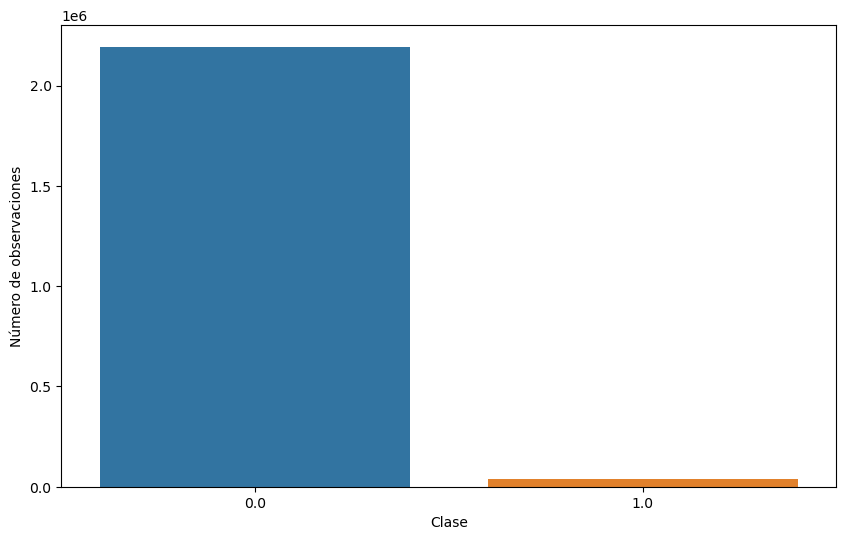

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x = datos[filas_con_missing]['fatality'], data = datos[filas_con_missing])
plt.xlabel("Clase")
plt.ylabel("Número de observaciones")

In [20]:
aux = pd.DataFrame(datos[filas_con_missing].groupby(['fatality'])['fatality'].count().rename('count'))
aux['percentage'] = aux['count']/aux['count'].sum()
aux = aux.sort_values(by = "count", ascending=False).reset_index()
aux

,fatality,count,percentage
0,0.0,2193406,0.983366
1,1.0,37103,0.016634


Como se podía esperar la proporción de accidentes mortales a accidentes no mortales en las filas con algún missing se conserva. En caso de eliminar los missings eliminariamos un total de 37103 de observaciones con accidentes mortales.

### 3.1.1. ¿Que tipo de vehículos son más propensos a tener accidentes mortales?

Con el objetivo de entender mejor cuáles son los vehículos más propensos a tener accidentes normales y sobre los cuales podría aplicarse una acción correctiva en prima del seguro vamos a dibujar un histograma que muestre la frecuencia con la que un accidente de cada tipo de vehículo resulta en accidente mortal. 

In [21]:
aux = datos.groupby(['vehicle_type'])['fatality'].mean() * 100
aux = pd.DataFrame(aux)
aux = aux.reset_index(level=0)

<Axes: xlabel='vehicle_type', ylabel='fatality'>

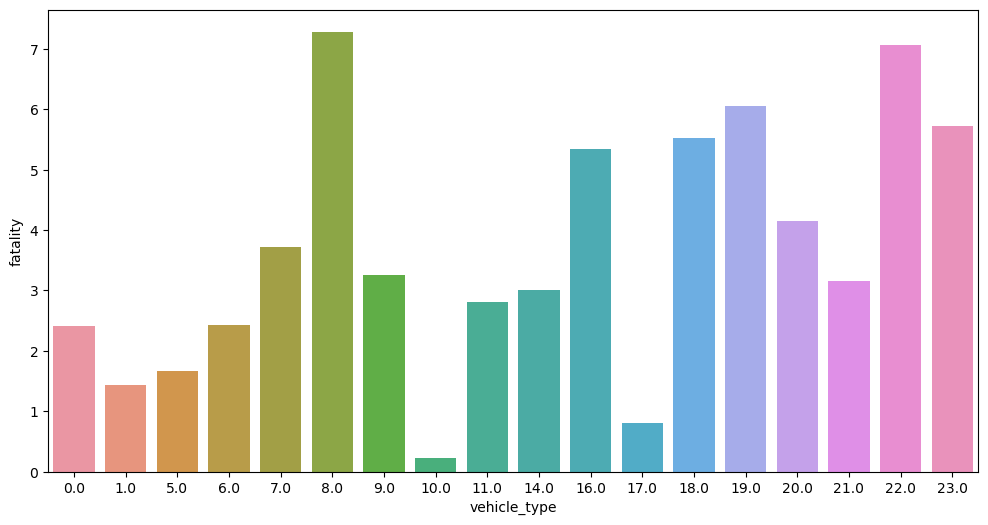

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(data = aux, x = 'vehicle_type', y = 'fatality')

En el gráfico podemos observar cómo, habiendo un accidente los tipos de vehículos con más posibilidades de que el accidente sea mortal son el tipo 8, correspondiente con los tractores; el tipo 22, correspondiente con las motos de nieve y el tipo 18, correspondiente con las autocaravanas. Todos ellos rondando el 6-7%.

También podría ser interesante ver qué porcentaje de cada tipo de vehículo hay en la muestra.

In [23]:
vehicle_type = datos.groupby(['vehicle_type'])['vehicle_type'].count()
aux = pd.DataFrame(vehicle_type)
aux = aux.set_axis(['count'], axis=1, inplace=False)
aux = aux.reset_index(level=0)
aux['percentage'] = aux['count']/sum(aux['count'])

<Axes: xlabel='vehicle_type', ylabel='percentage'>

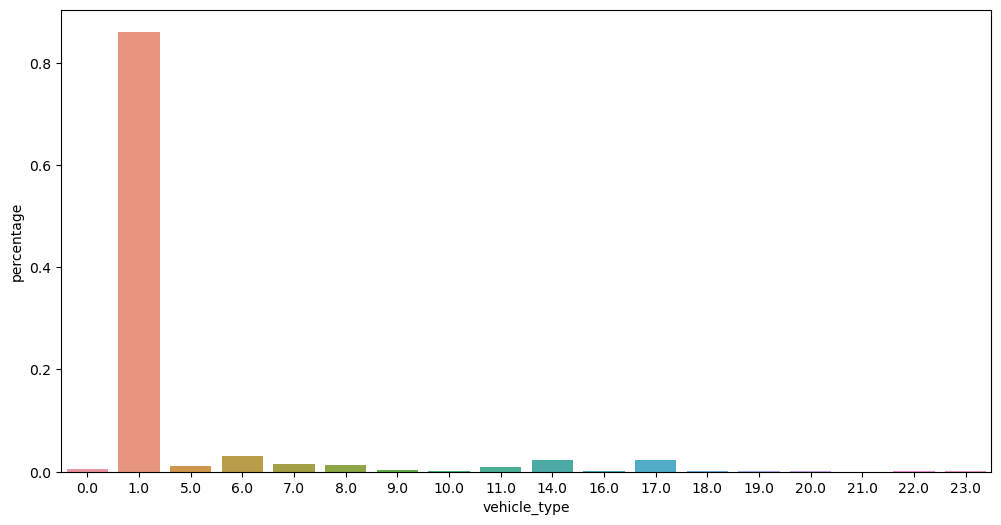

In [24]:
plt.figure(figsize = (12,6))
sns.barplot(data = aux, x = 'vehicle_type', y = 'percentage')

En el gráfico anterior vemos la frecuencia de accidentes en función del tipo de vehículo. Vemos que el 90% de los accidentes son del tipo 1, correpondiente con coches de pasajeros, furgonetas de pasajeros, o pick-ups.

En segundo lugar, bastante alejado del primer puesto, podemos ver que el siguiente vehículo con más accidentes es el tipo 6, correspondientes con camiones y furgonetas, y se encuentran en el 3% de los accidentes; seguidos del tipo 14, correspondiente con las motocicletas, que se encuentran en un 1% de los accidentes.


Es interesante también observar cómo la edad del vehículo se relaciona con los accidentes mortales. Primero observaremos la frecuencia con la que un accidente de un vehículo de determinada edad es mortal y posteriormente cómo se distribuyen los accidentes mortales en la muestra.

In [25]:
datos_help = datos
datos_help['vehicle_age'] = datos_help['year'] - datos_help['vehicle_year'] 
datos_help = datos_help.dropna()
datos_help['vehicle_age'] = datos_help['vehicle_age'].astype(int)

In [26]:
aux = datos_help.groupby(['vehicle_age'])['fatality'].mean() * 100
aux = pd.DataFrame(aux)
aux = aux.reset_index(level=0)

<Axes: xlabel='vehicle_age', ylabel='fatality'>

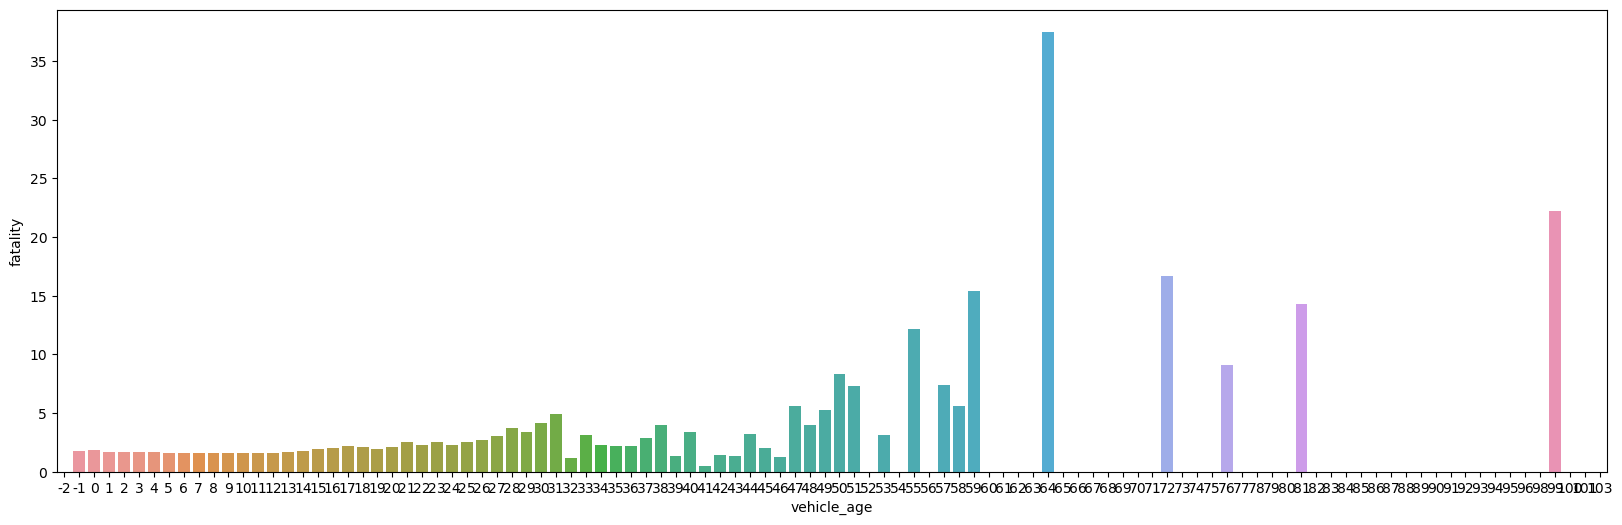

In [27]:
plt.figure(figsize = (20,6))
sns.barplot(data = aux, x = 'vehicle_age', y = 'fatality')

Se observa que cuanto mayor es la edad del vehículo las probabilidades de que el accidente sea mortal aumentan. Esto nos podría indicar que la variable _vehicle\_age_ es relevante para el estudio.

In [28]:
vehicle_age = datos_help[datos_help['fatality'] == 1].groupby(['vehicle_age'])['vehicle_age'].count()
aux = pd.DataFrame(vehicle_age)
aux = aux.set_axis(['count'], axis=1, inplace=False)
aux = aux.reset_index(level=0)
aux['percentage'] = aux['count']/sum(aux['count'])

<Axes: xlabel='vehicle_age', ylabel='percentage'>

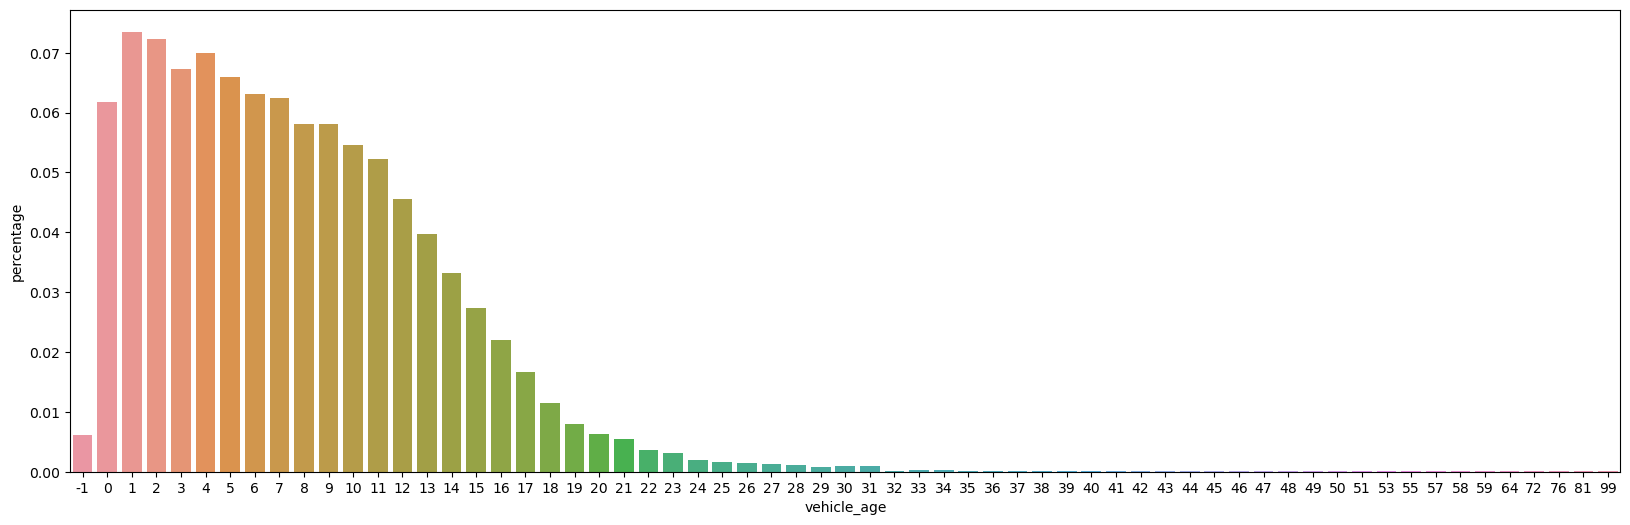

In [29]:
plt.figure(figsize = (20,6))
sns.barplot(data = aux, x = 'vehicle_age', y = 'percentage')

En este gráfico se observan dos cosas:
    
* Hay datos en los que el accidente sucedió antes del lanzamiento del vehículo, probablemente correspondiente a test que se estaban llevando a cabo antes de su lanzamiento.

* Cuanto mayor es la edad del coche menos accidentes mortales hay, probablemente debido a que hay menos vehículos en circulación.

### 3.1.2. ¿Qué tipo de conductores son más propensos a tener accidentes mortales?

Con el mismo objetivo que la sección anterior, vamos a analizar como se relaciona la variable _passenger\_sex_ con la frecuencia de accidentes mortales para cada tipo de conductor.

Para ello se define un dataframe con los datos de los conductores de los vehículos.

In [30]:
datos_help = datos
datos_help = datos_help[datos_help['passenger_position'] == 11]

In [31]:
aux = datos.groupby(['passenger_sex'])['fatality'].mean() * 100
aux = pd.DataFrame(aux)
aux = aux.reset_index(level=0)

<Axes: xlabel='passenger_sex', ylabel='fatality'>

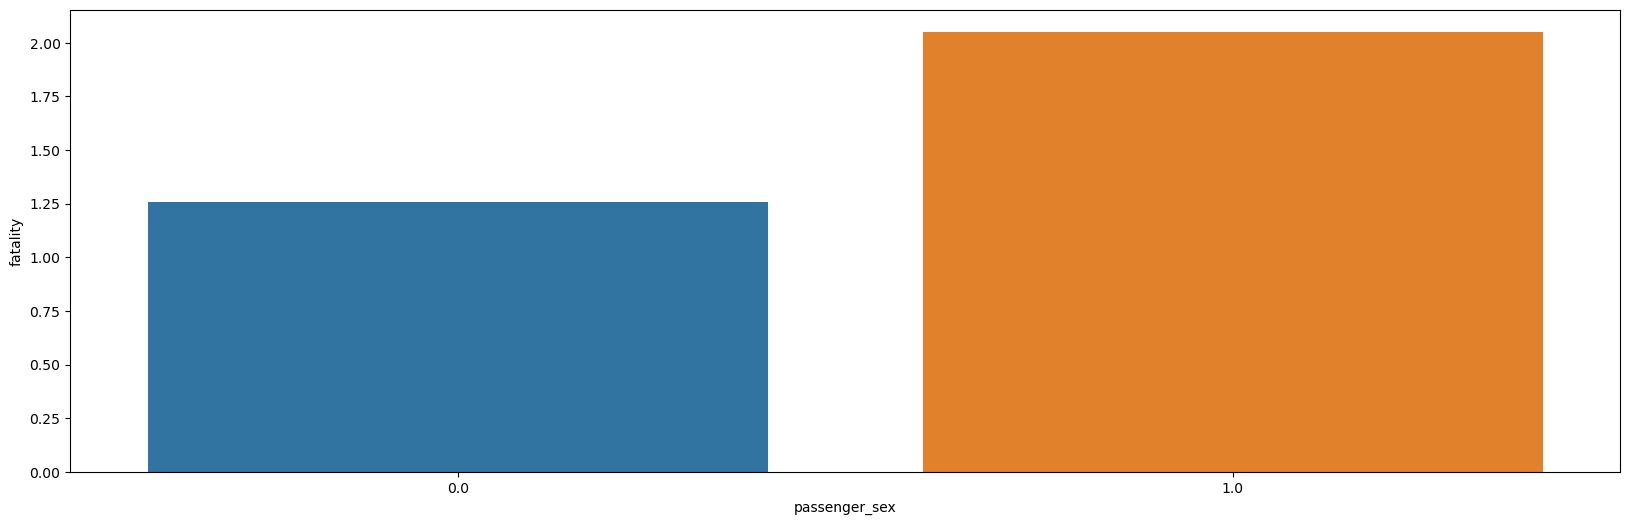

In [32]:
plt.figure(figsize = (20,6))
sns.barplot(data = aux, x = 'passenger_sex', y = 'fatality')

Se puede observar como es un 0.75% más probable que, en caso de accidente, si el conductor es un hombre sea mortal.

In [33]:
passenger_sex = datos_help[datos_help['fatality'] == 1].groupby(['passenger_sex'])['passenger_sex'].count()
aux = pd.DataFrame(passenger_sex)
aux = aux.set_axis(['count'], axis=1, inplace=False)
aux = aux.reset_index(level=0)

<Axes: xlabel='passenger_sex', ylabel='count'>

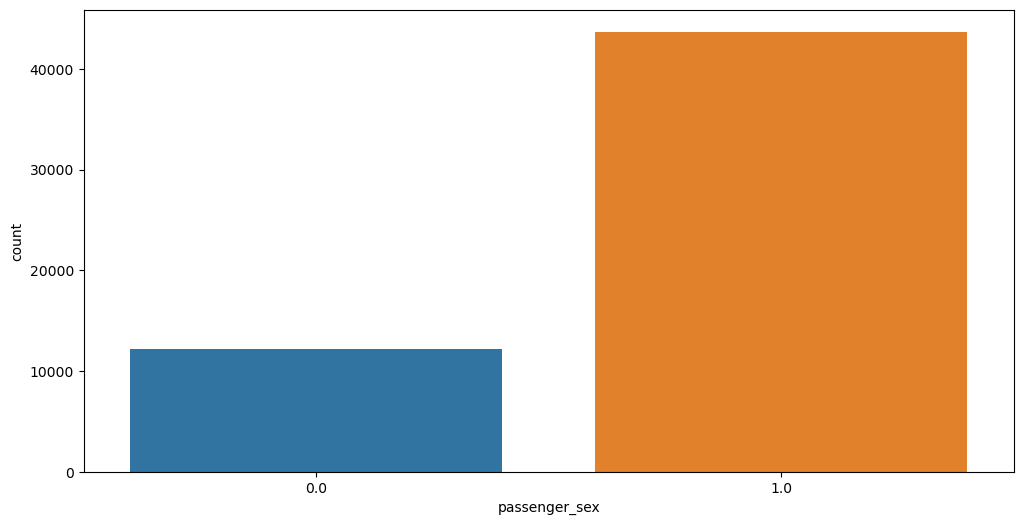

In [34]:
plt.figure(figsize = (12,6))
sns.barplot(data = aux, x = 'passenger_sex', y = 'count')

La gran mayoría de los conductores involucrados en un accidente mortal son hombres.

Es interesante también observar como la edad del conductor se relaciona con la fatalidad y con los accidentes, ya que generalmente es conocido que cuanto mayor es una persona, peores reflejos se tienen.

In [35]:
passenger_age = datos_help[datos_help['fatality'] == 1].groupby(['passenger_age'])['passenger_age'].count()
aux = pd.DataFrame(passenger_age)
aux = aux.set_axis(['count'], axis=1, inplace=False)
aux = aux.reset_index(level=0)

passenger_age = datos_help[datos_help['fatality'] == 0].groupby(['passenger_age'])['passenger_age'].count()
aux2 = pd.DataFrame(passenger_age)
aux2 = aux2.set_axis(['count'], axis=1, inplace=False)
aux2 = aux2.reset_index(level=0)

<Axes: xlabel='passenger_age', ylabel='count'>

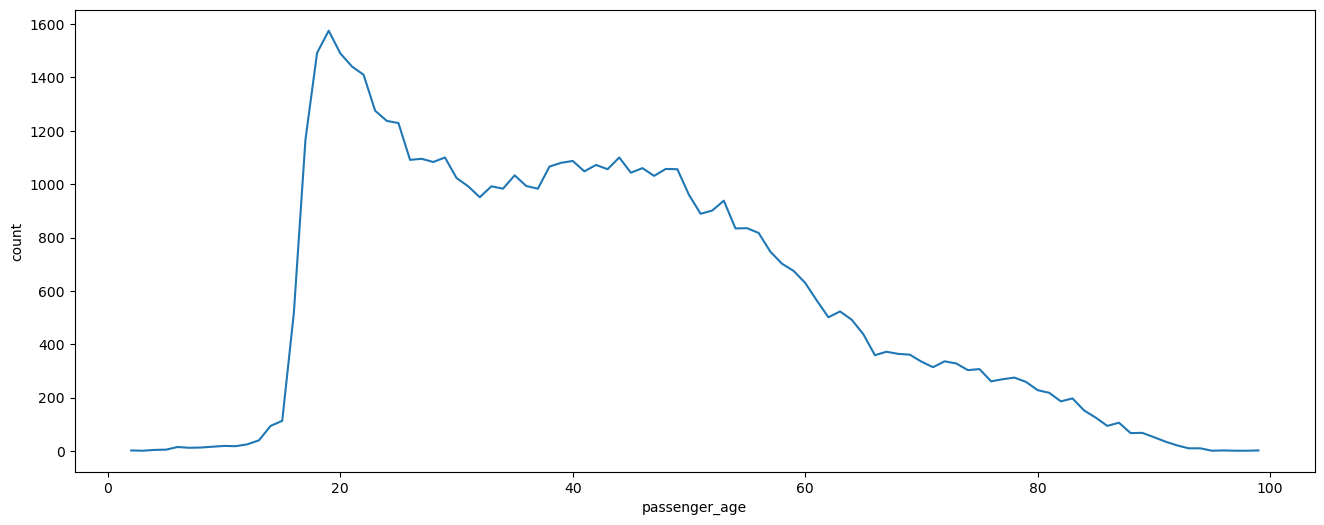

In [36]:
plt.figure(figsize = (16,6))
sns.lineplot(data = aux, x = 'passenger_age', y = 'count')

Se puede observar en este gráfico:

* Los accidentes empiezan a ser postivos alrededor de los 16 años, cuando ya es legal conducir.

* Se alcanza el máximo sobre los 20 años.

* A partir de los 20 la cantidad de accidentes mortales va disminuyendo.

<Axes: xlabel='passenger_age', ylabel='count'>

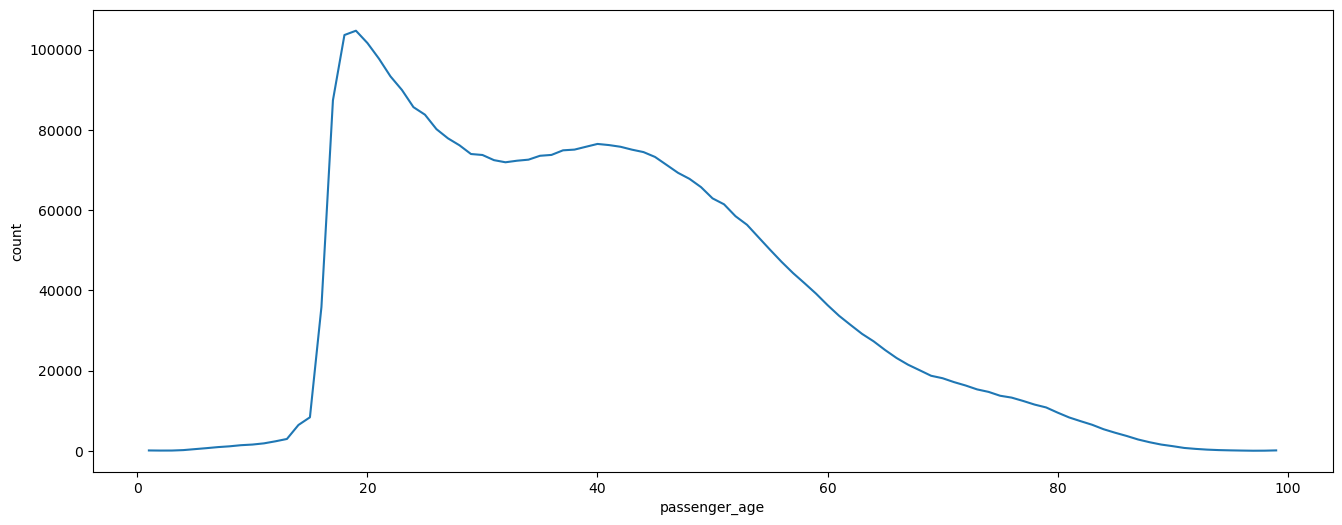

In [37]:
plt.figure(figsize = (16,6))
sns.lineplot(data = aux2, x = 'passenger_age', y = 'count')

### 3.1.3. ¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?

Analizaremos que variables son las que más afectan a que se sufra un accidente mortal

In [38]:
datos.columns

Index(['year', 'month', 'weekday', 'hour', 'fatality', 'vehicles_involved',
       'collision_config', 'roadway_config', 'weather', 'surface_state',
       'road_alignment', 'traffic', 'vehicle_id', 'vehicle_type',
       'vehicle_year', 'passenger_id', 'passenger_sex', 'passenger_age',
       'passenger_position', 'passenger_fatality', 'passenger_safety',
       'passenger_type', 'vehicle_age'],
      dtype='object')

In [39]:
datos_help = datos[datos['fatality'] == 1]
colision = pd.DataFrame(datos_help.groupby(['collision_config'])['fatality'].count())
colision['accidents'] = datos.groupby(['collision_config'])['fatality'].count()
colision['porcentaje_mortales'] = colision['fatality'] / colision['accidents'] * 100
colision = colision.reset_index(level=0)

<Axes: xlabel='collision_config', ylabel='porcentaje_mortales'>

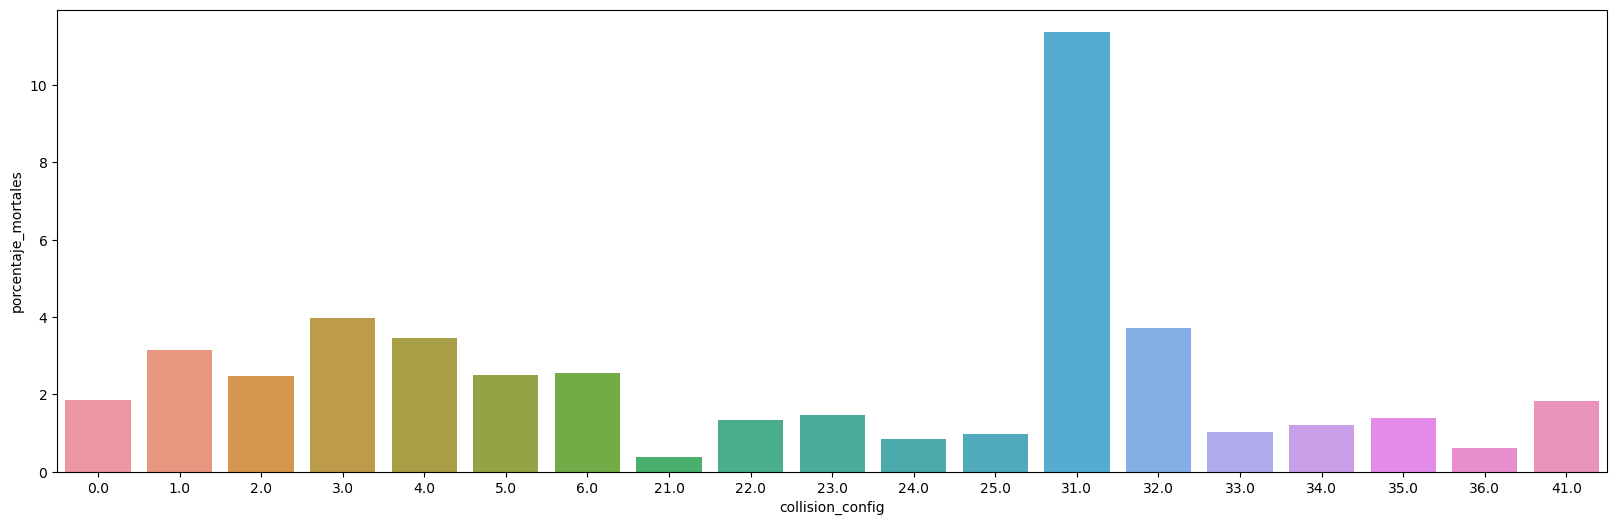

In [40]:
plt.figure(figsize = (20,6))
sns.barplot(data = colision, x = 'collision_config', y = 'porcentaje_mortales')

Se observa cómo el tipo de colision puede afectar a que el accidente sea mortal o no, siendo el que más accidentes mortales en porcentaje causa: el accidente frontal.

In [41]:
datos_help = datos[datos['fatality'] == 1]
weather = pd.DataFrame(datos_help.groupby(['weather'])['fatality'].count())
weather['accidents'] = datos.groupby(['weather'])['fatality'].count()
weather['porcentaje_mortales'] = weather['fatality'] / weather['accidents'] * 100
weather = weather.reset_index(level=0)

<Axes: xlabel='weather', ylabel='porcentaje_mortales'>

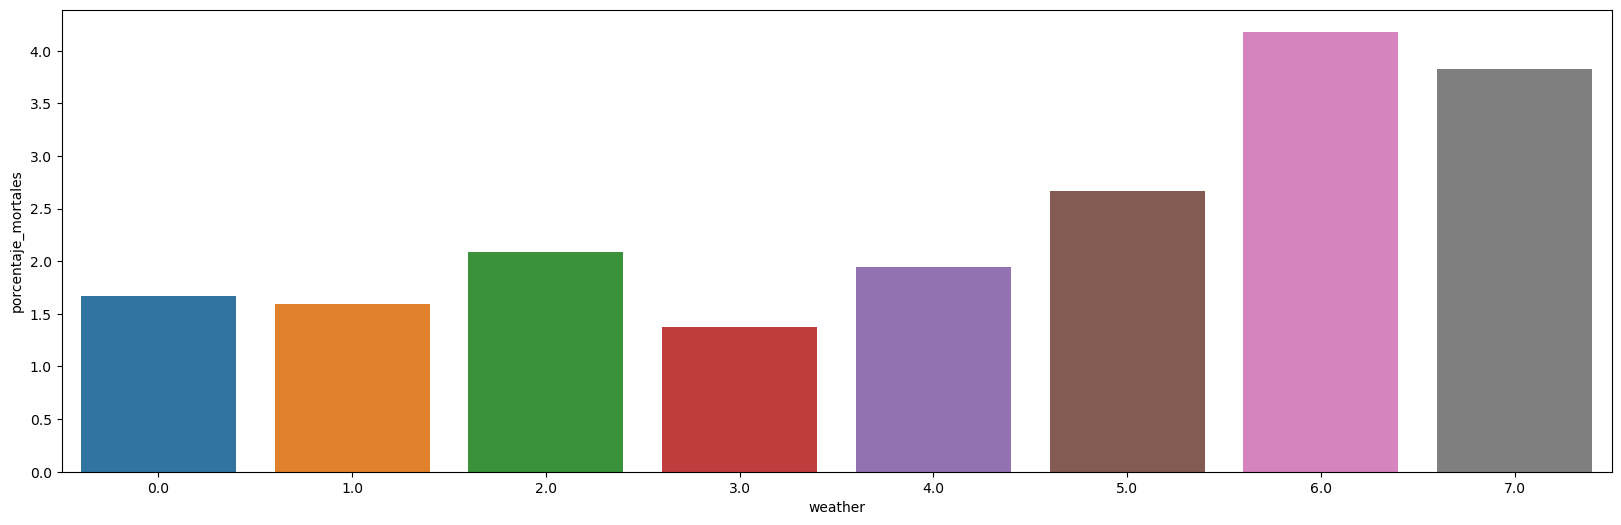

In [42]:
plt.figure(figsize = (20,6))
sns.barplot(data = weather, x = 'weather', y = 'porcentaje_mortales')

Observamos que con vientos fuertes y poca visibilidad los accidentes tienden a ser más mortales.

In [43]:
datos_help = datos[datos['fatality'] == 1]
road_alignment = pd.DataFrame(datos_help.groupby(['road_alignment'])['fatality'].count())
road_alignment['accidents'] = datos.groupby(['road_alignment'])['fatality'].count()
road_alignment['porcentaje_mortales'] = road_alignment['fatality'] / road_alignment['accidents'] * 100
road_alignment = road_alignment.reset_index(level=0)

<Axes: xlabel='road_alignment', ylabel='porcentaje_mortales'>

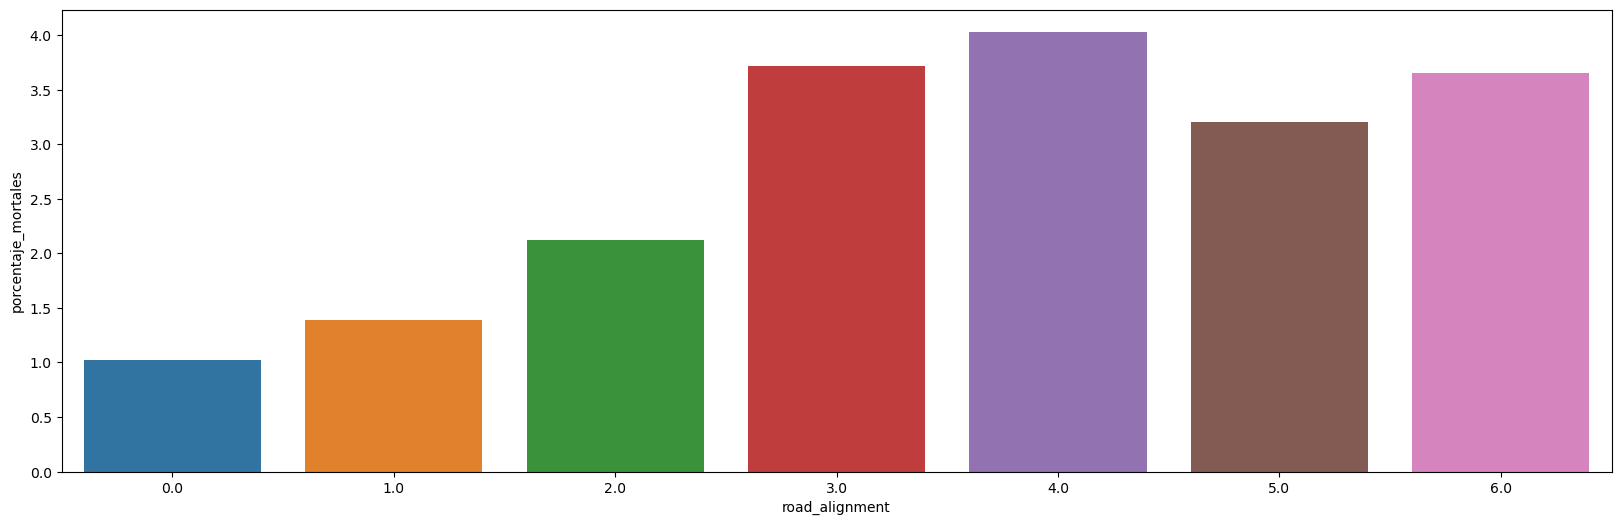

In [44]:
plt.figure(figsize = (20,6))
sns.barplot(data = road_alignment, x = 'road_alignment', y = 'porcentaje_mortales')

En curvas pronunciadas se producen más accidentes mortales

Realizaremos un vistazo general de todas las variables.

In [45]:
columns = ['year', 'month', 'weekday', 'hour', 'vehicles_involved',
       'collision_config', 'roadway_config', 'weather', 'surface_state',
       'road_alignment', 'traffic', 'vehicle_id', 'vehicle_type',
       'vehicle_year','vehicle_age', 'passenger_id', 'passenger_sex', 'passenger_age',
       'passenger_position', 'passenger_safety',
       'passenger_type']

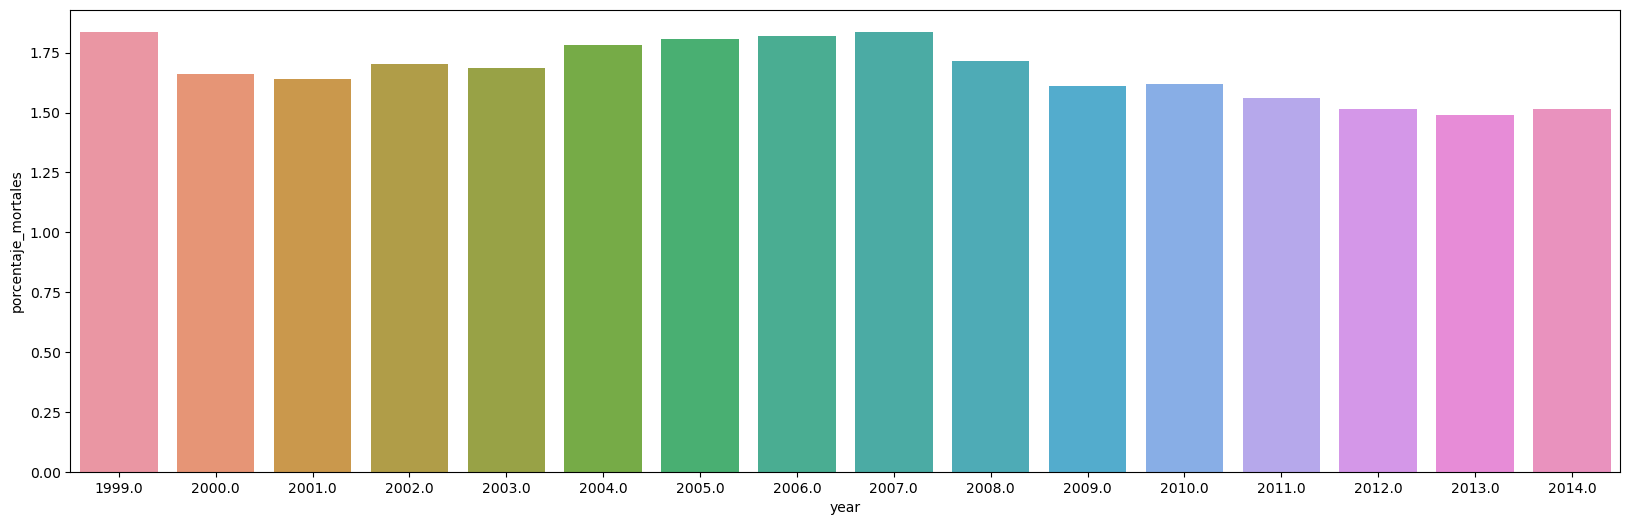

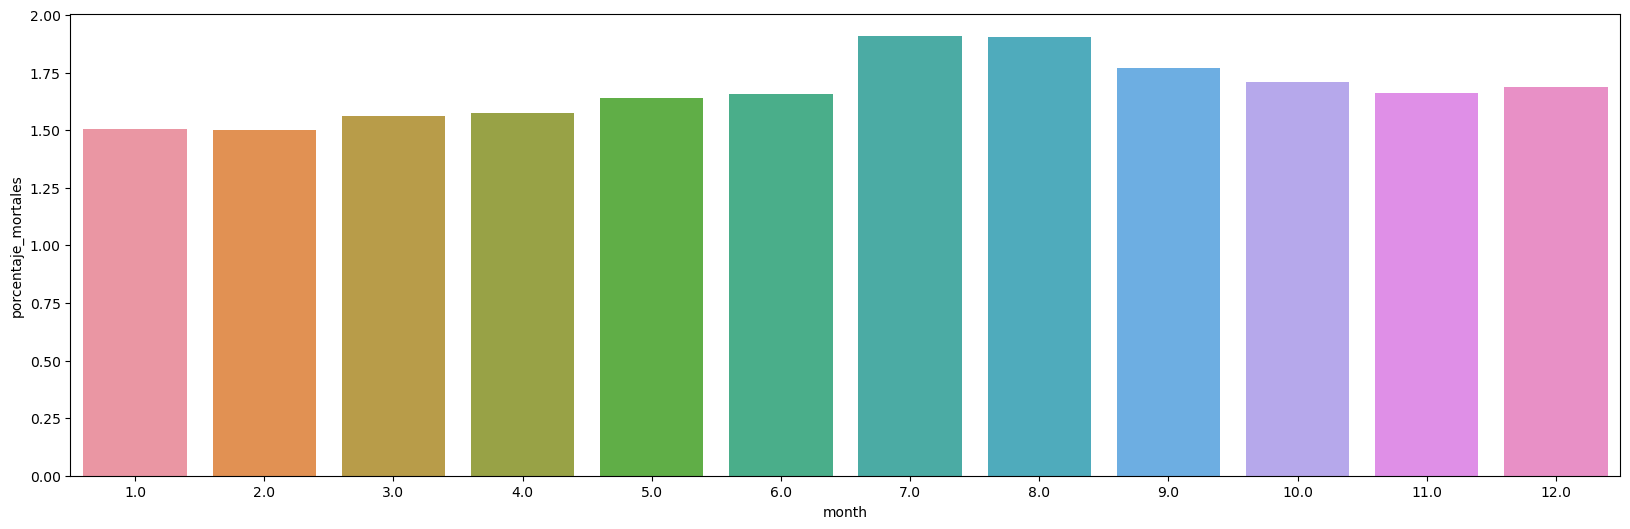

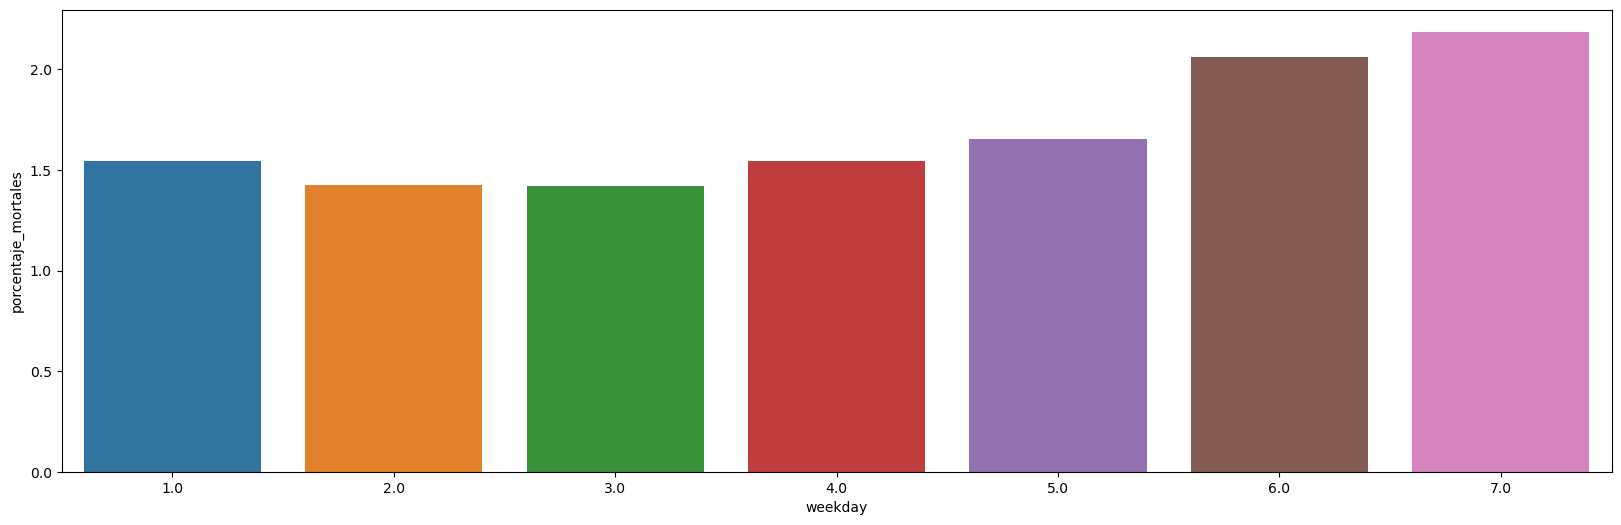

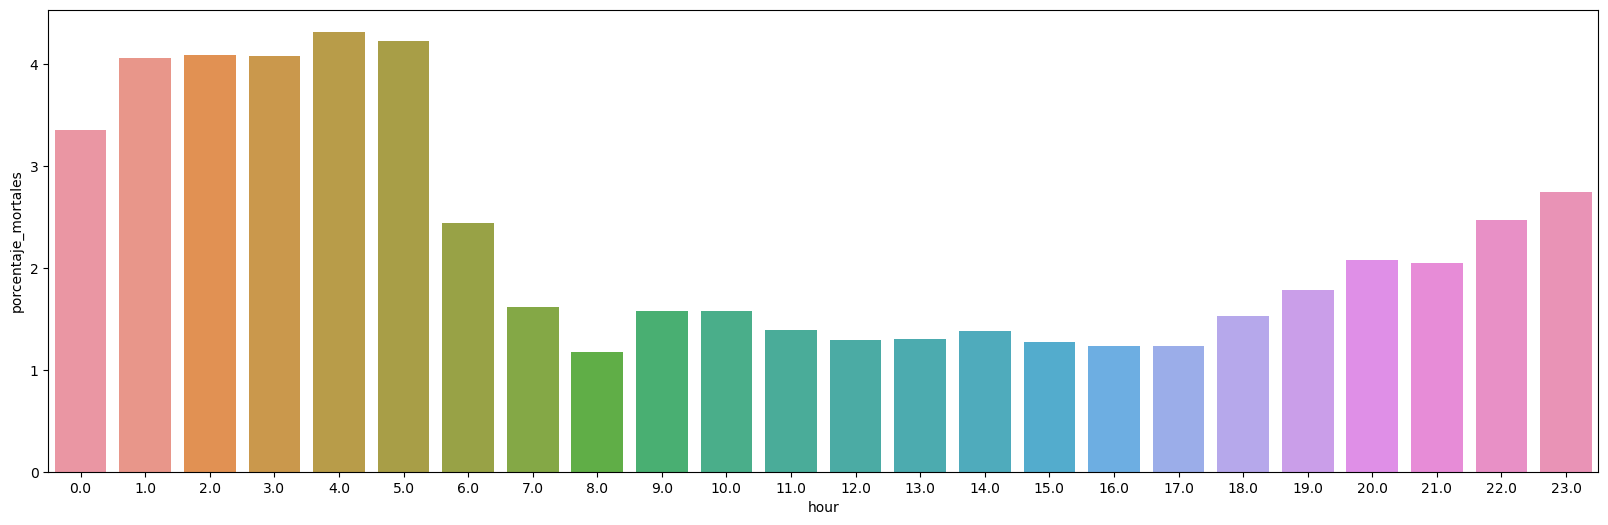

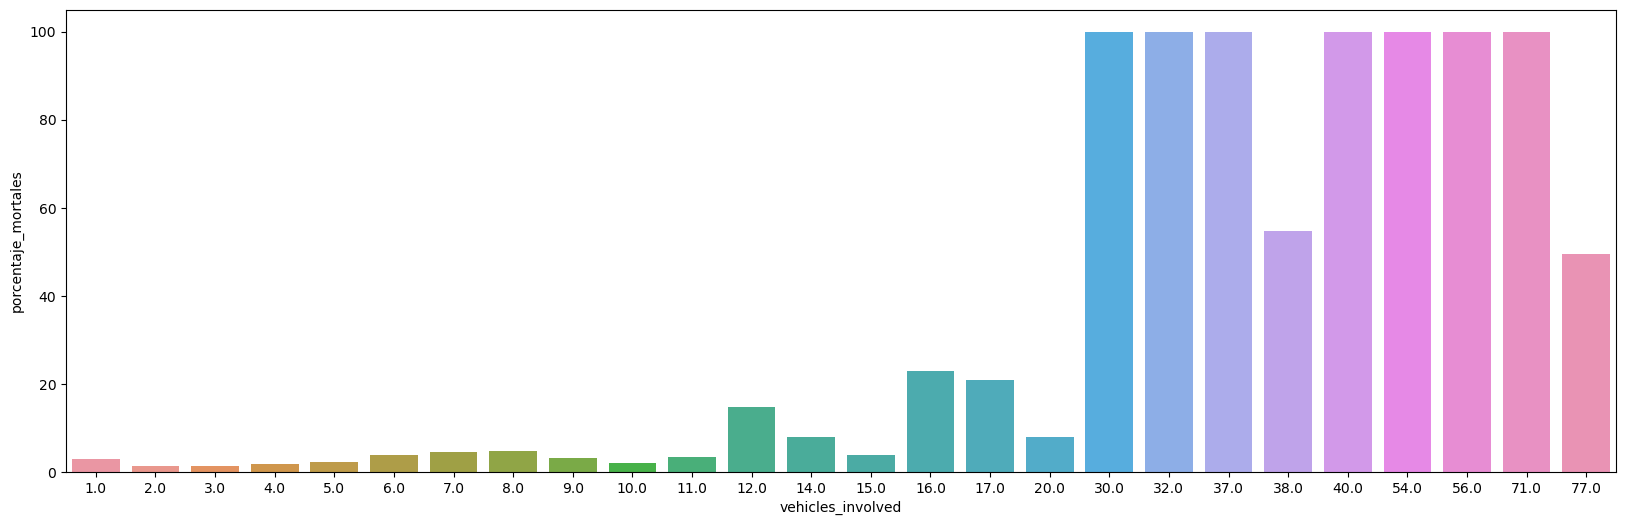

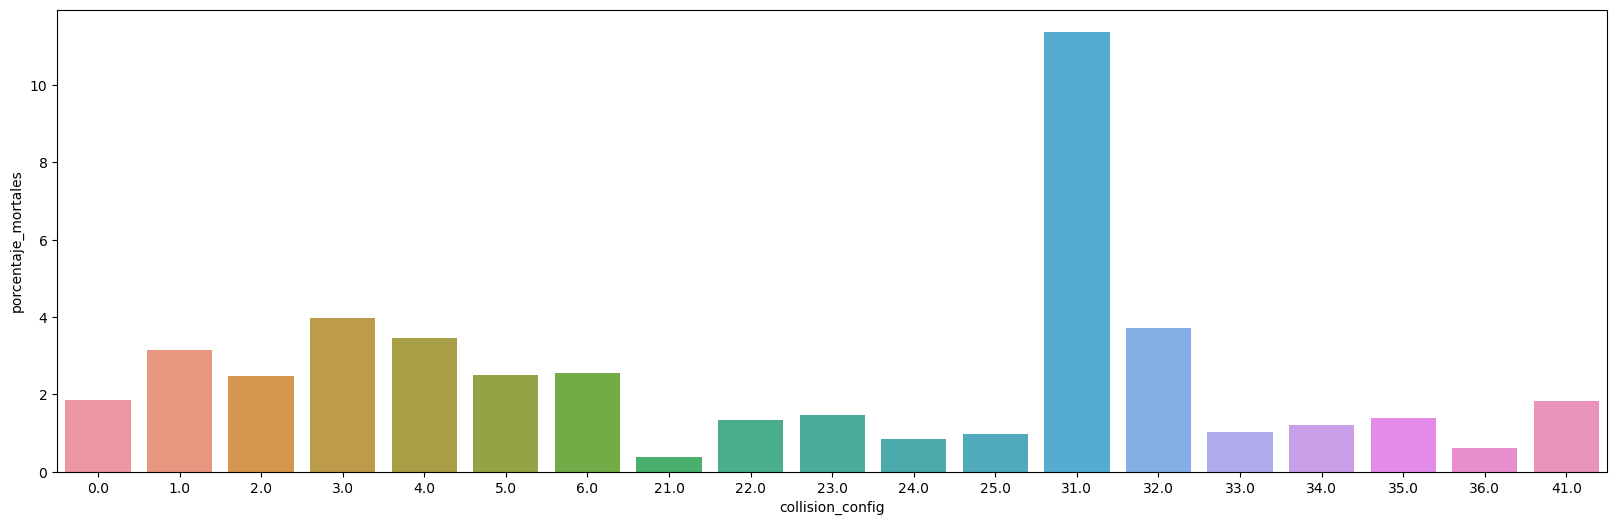

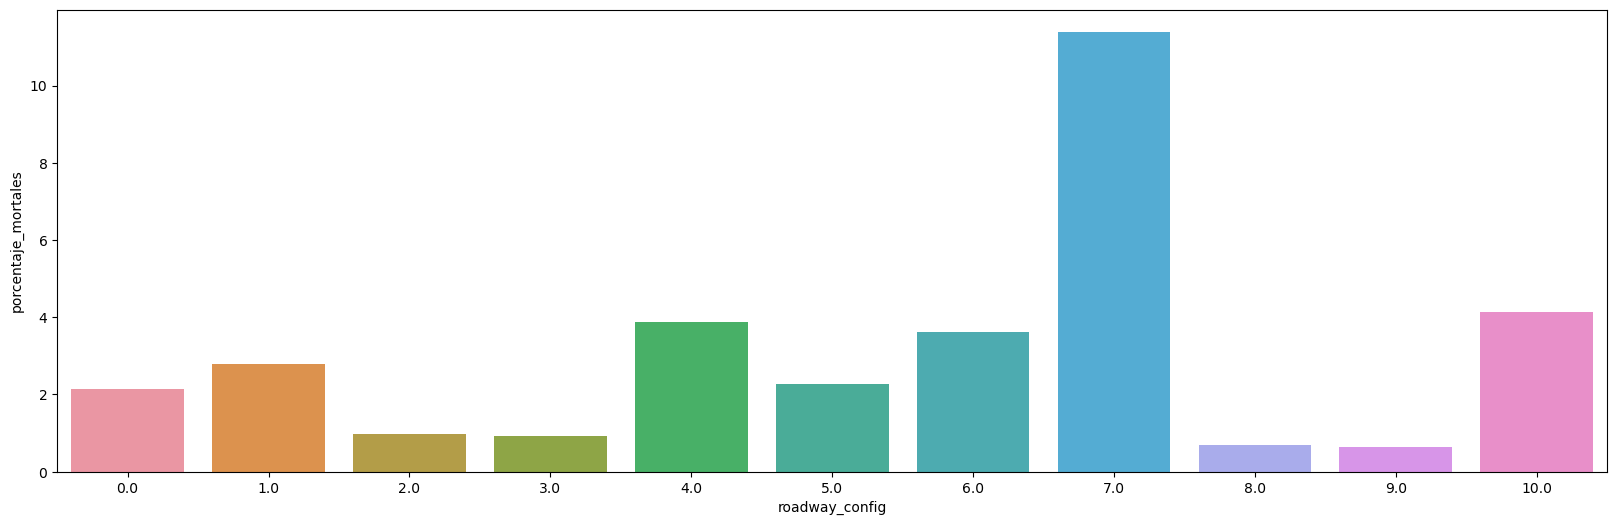

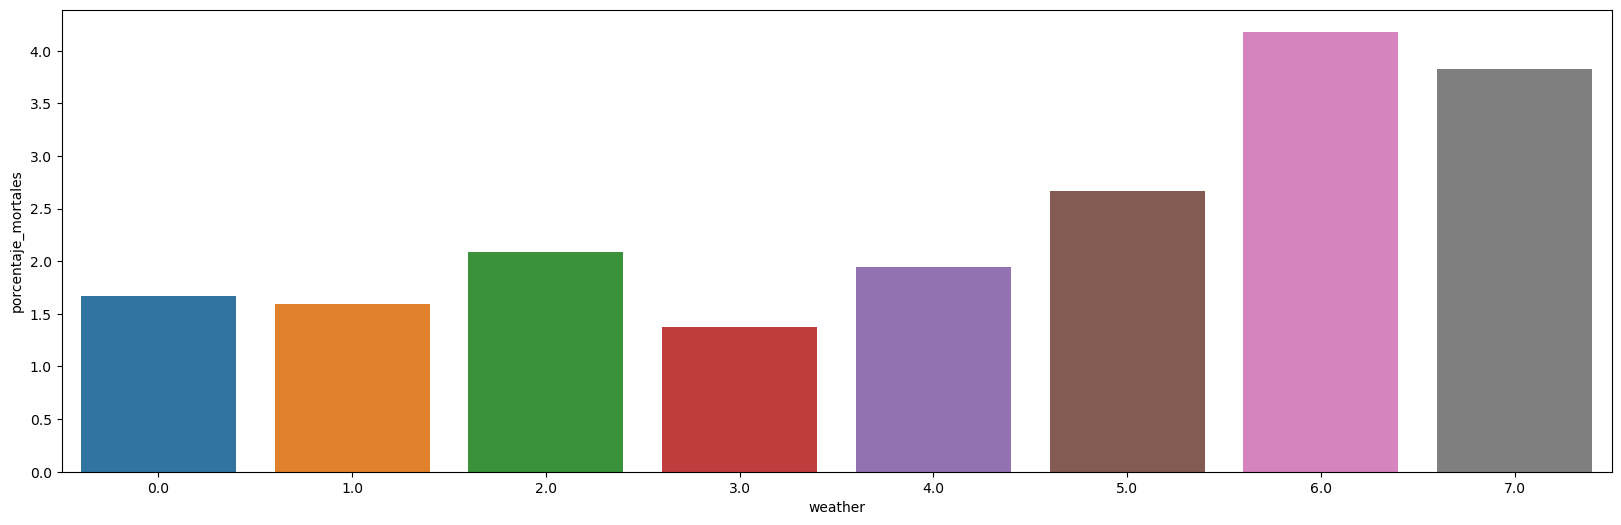

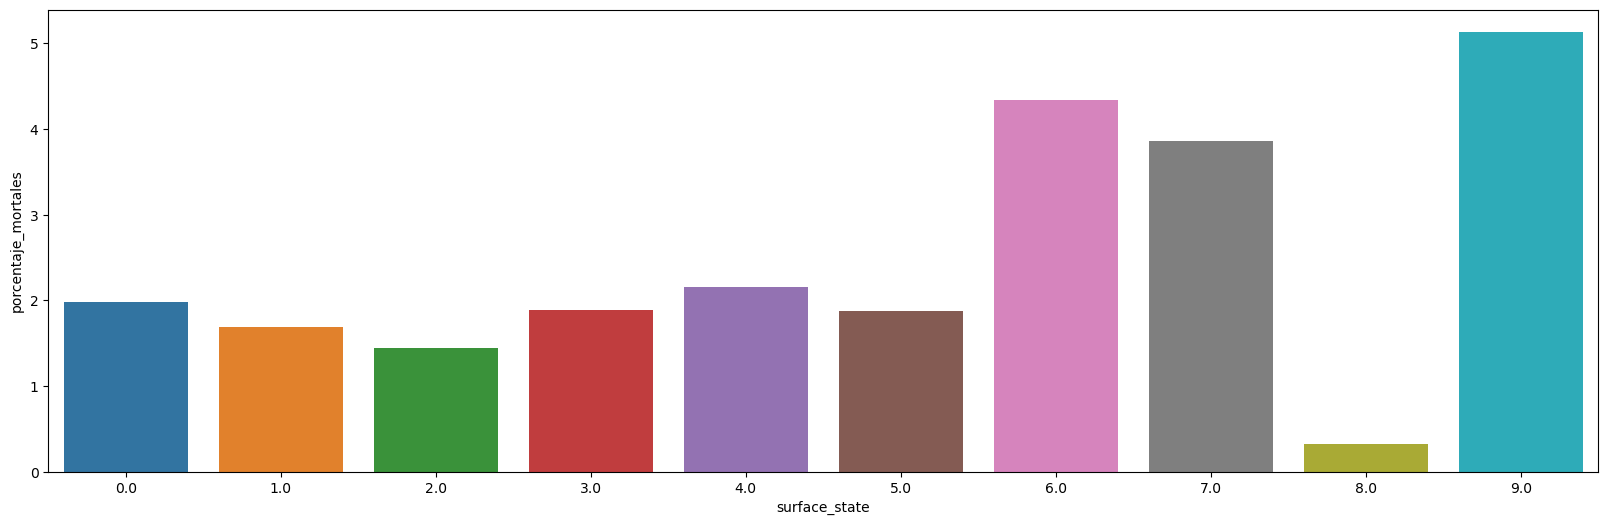

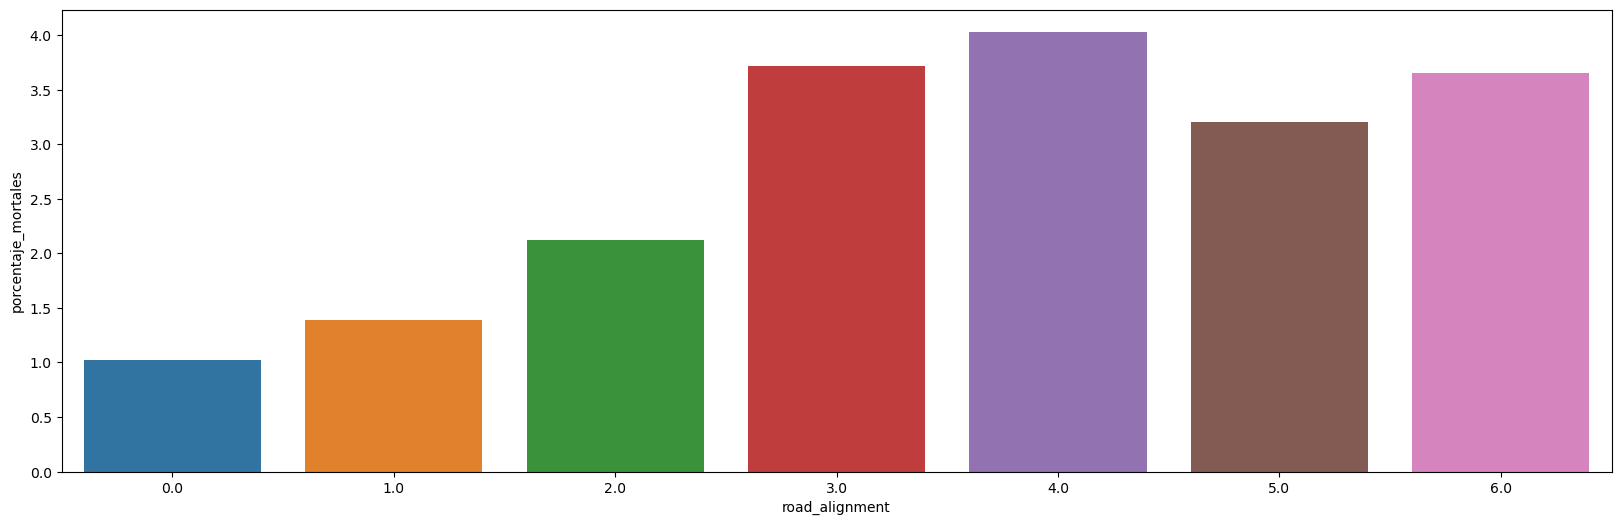

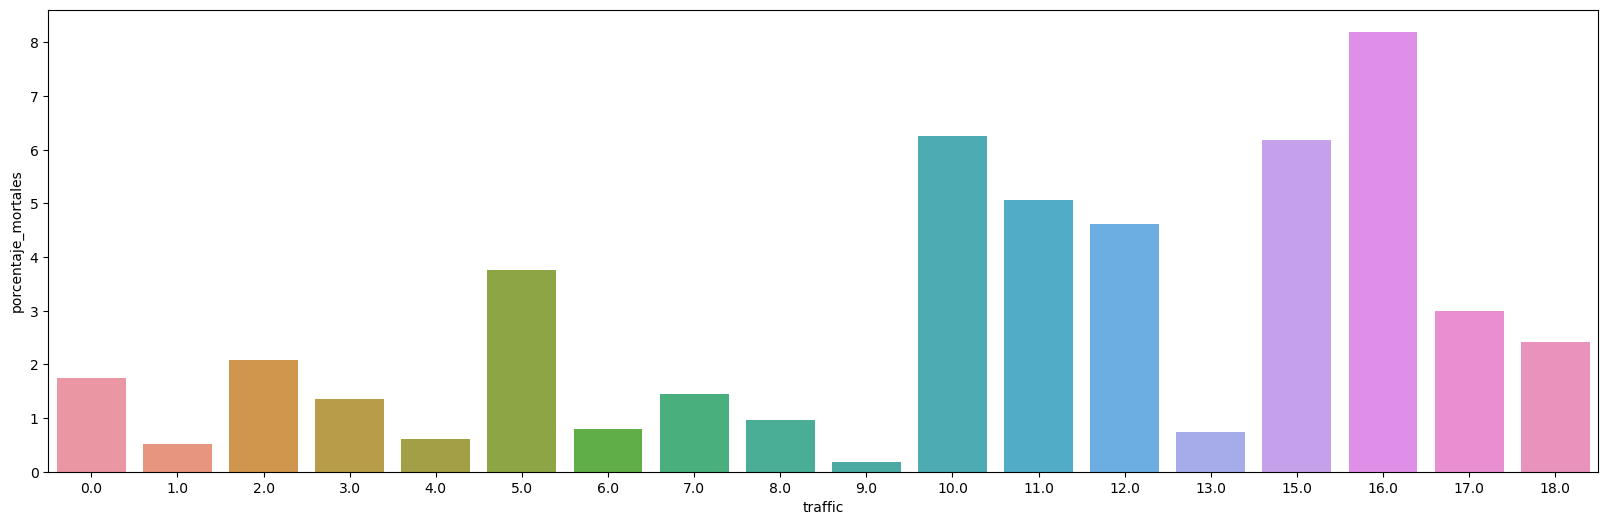

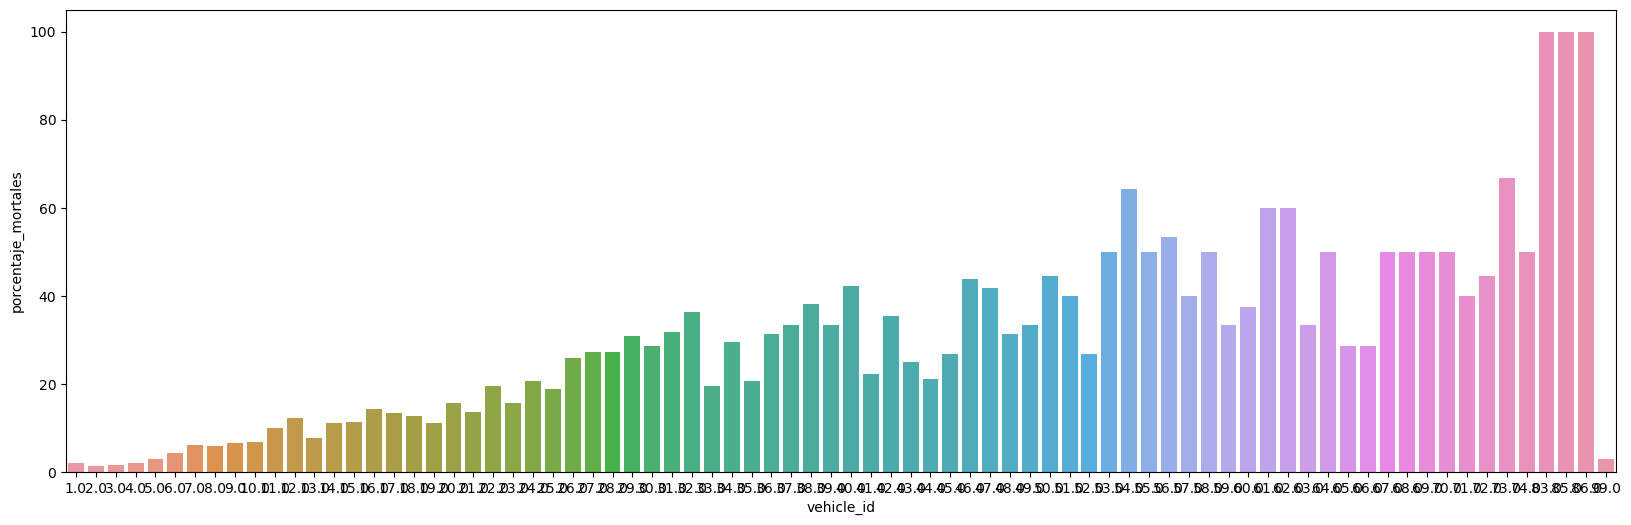

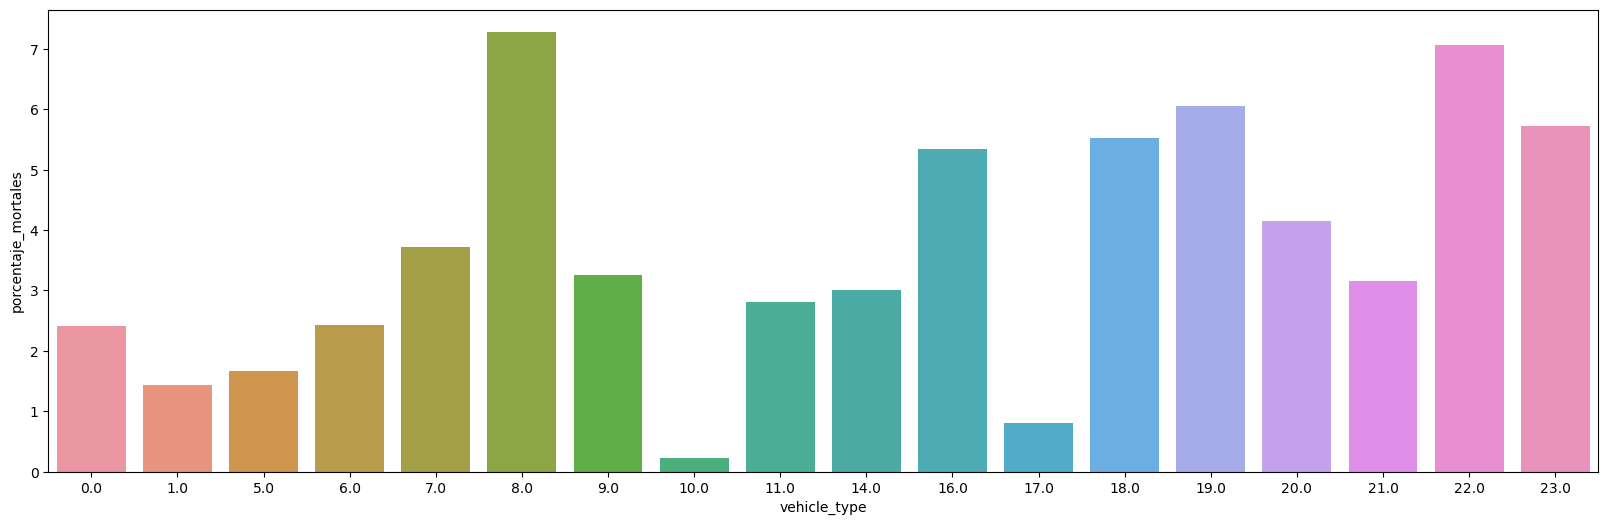

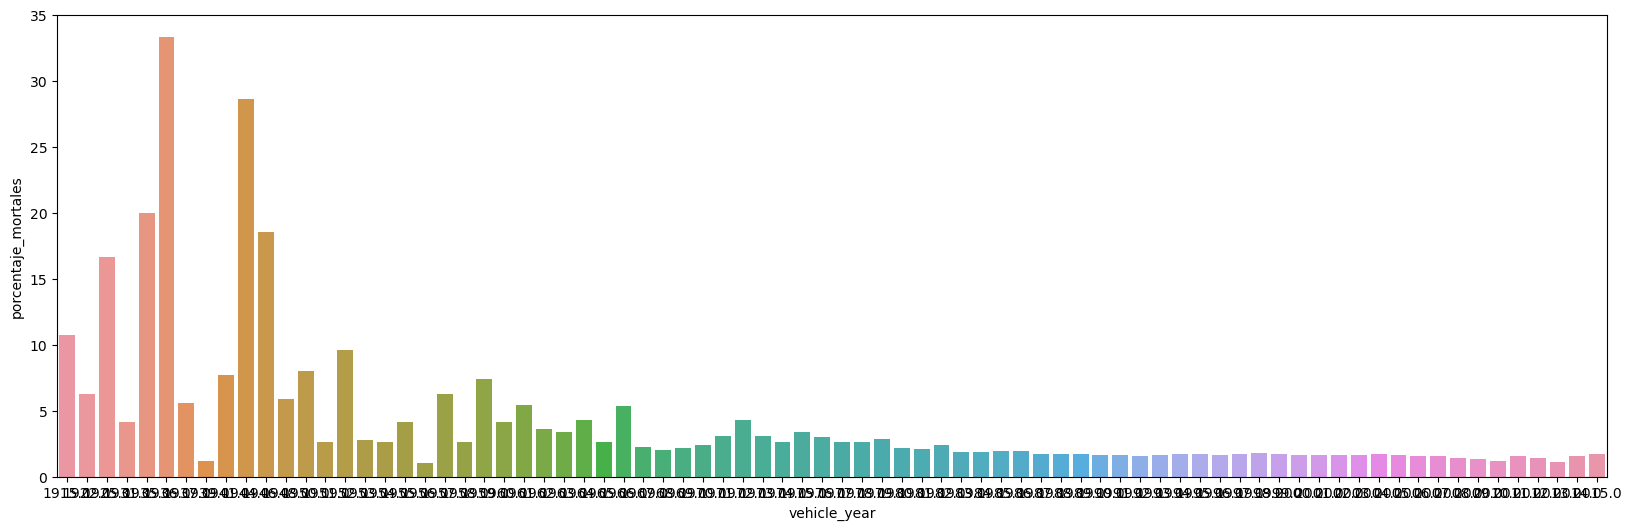

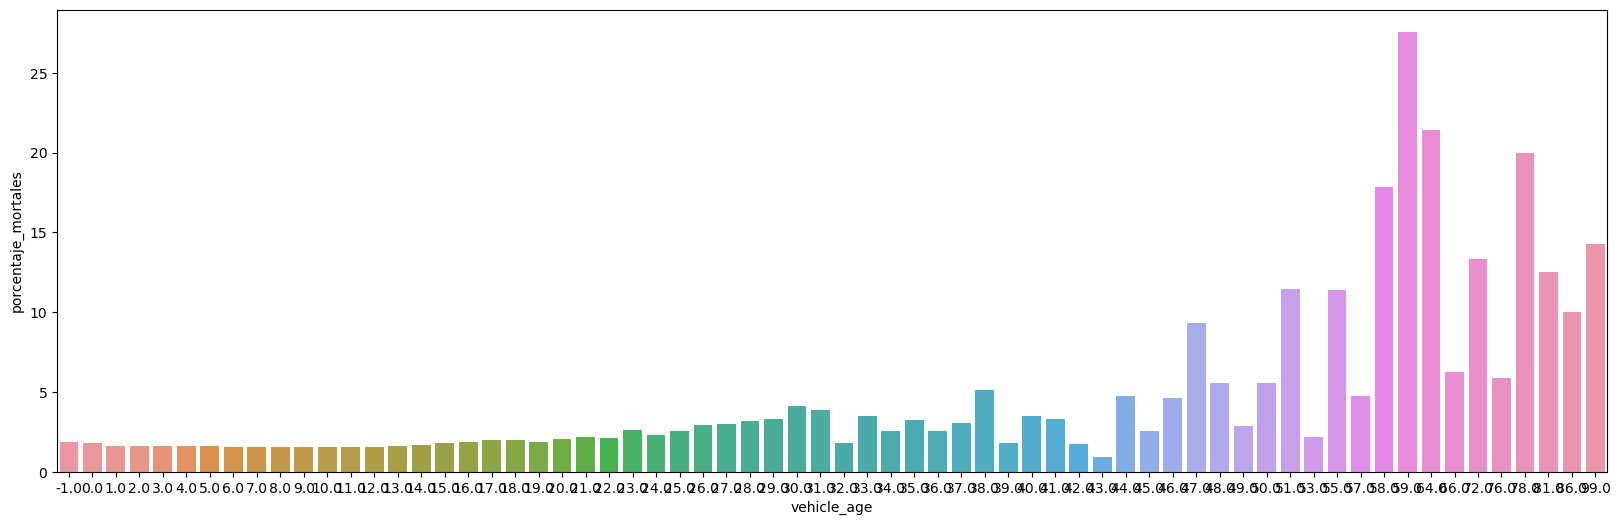

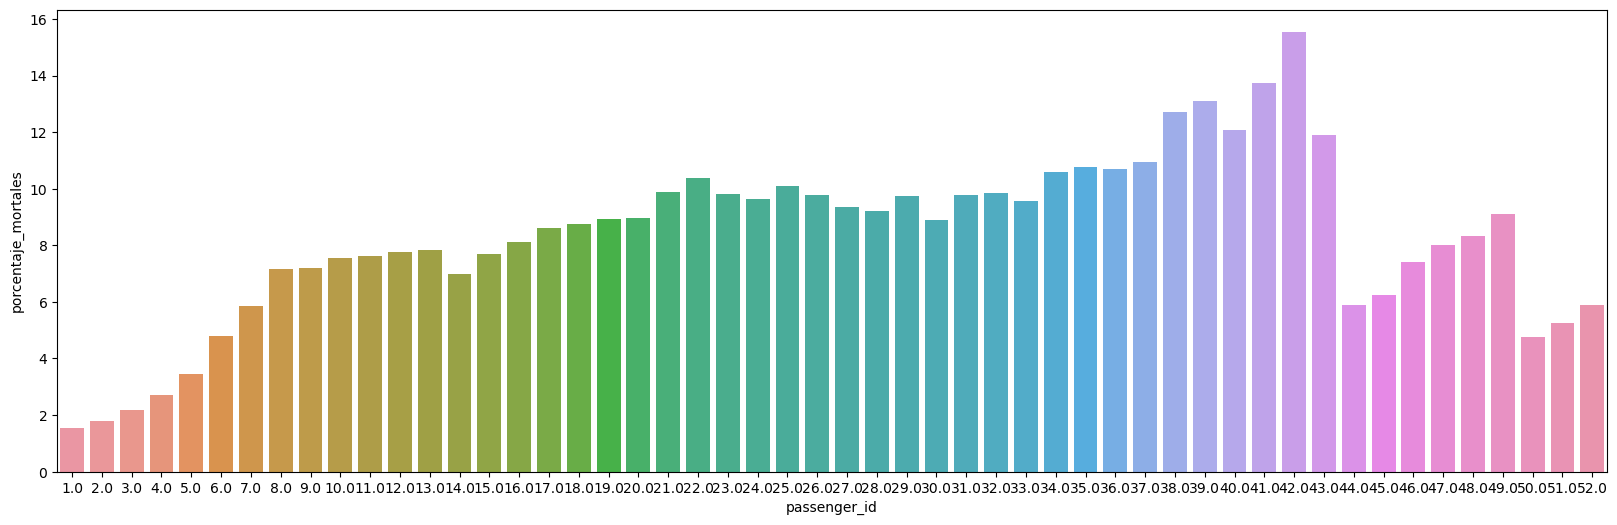

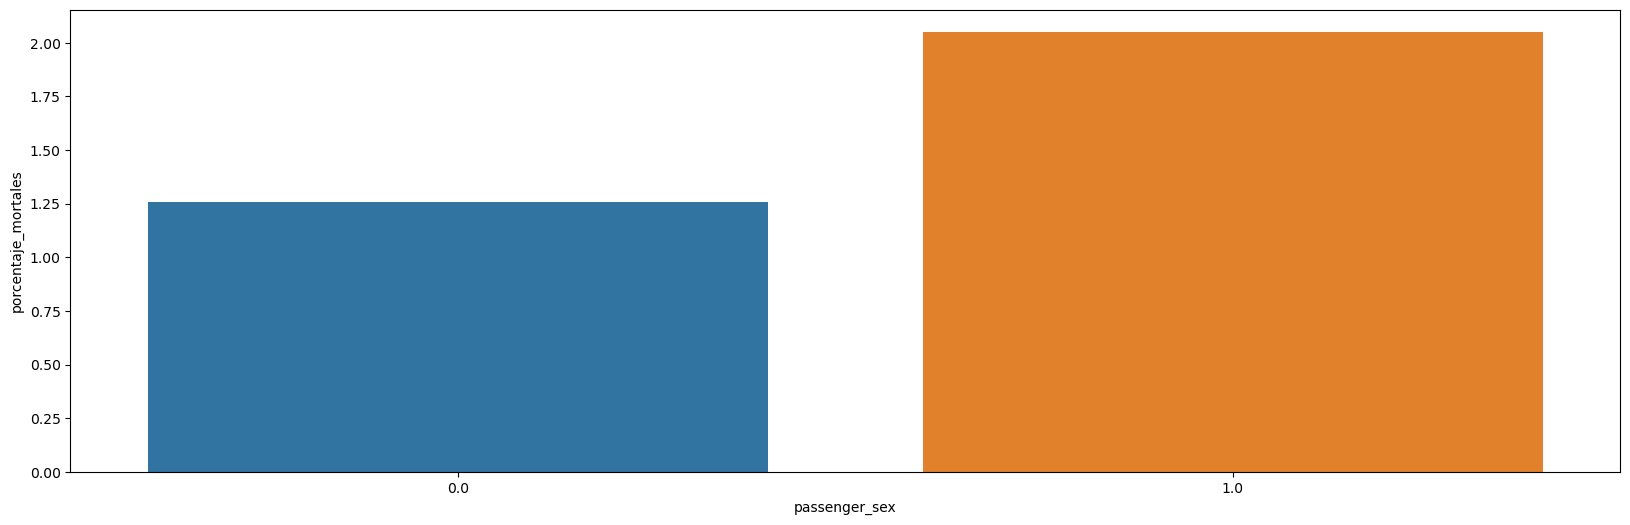

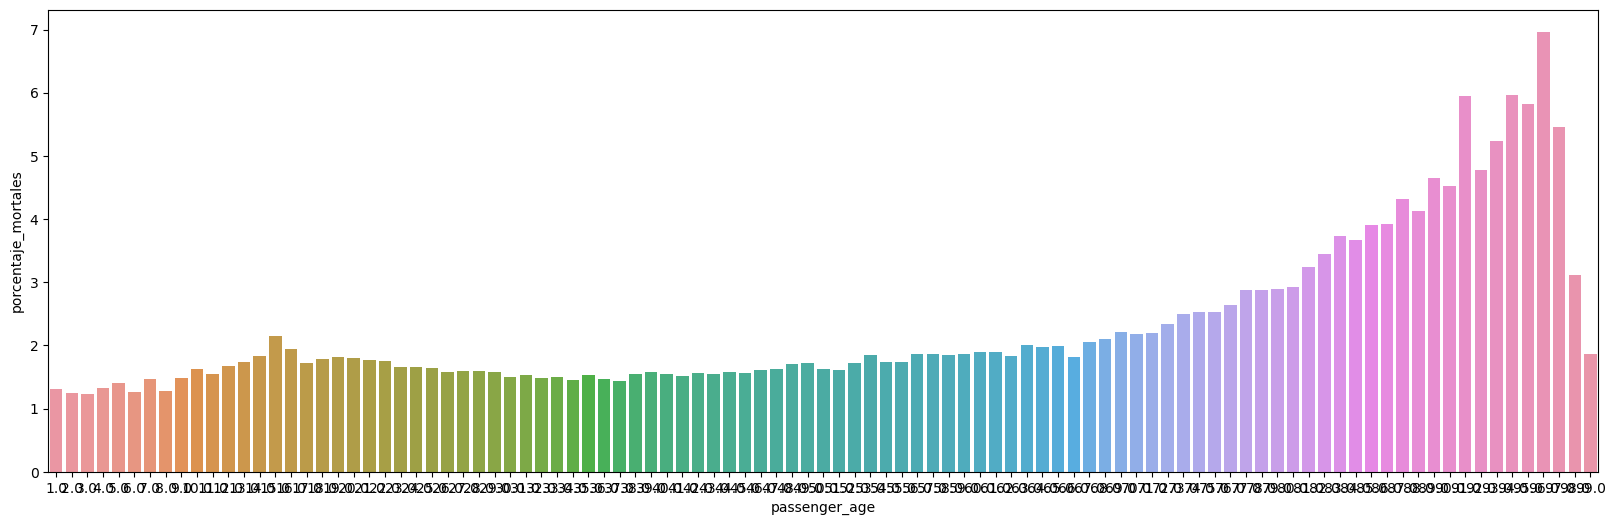

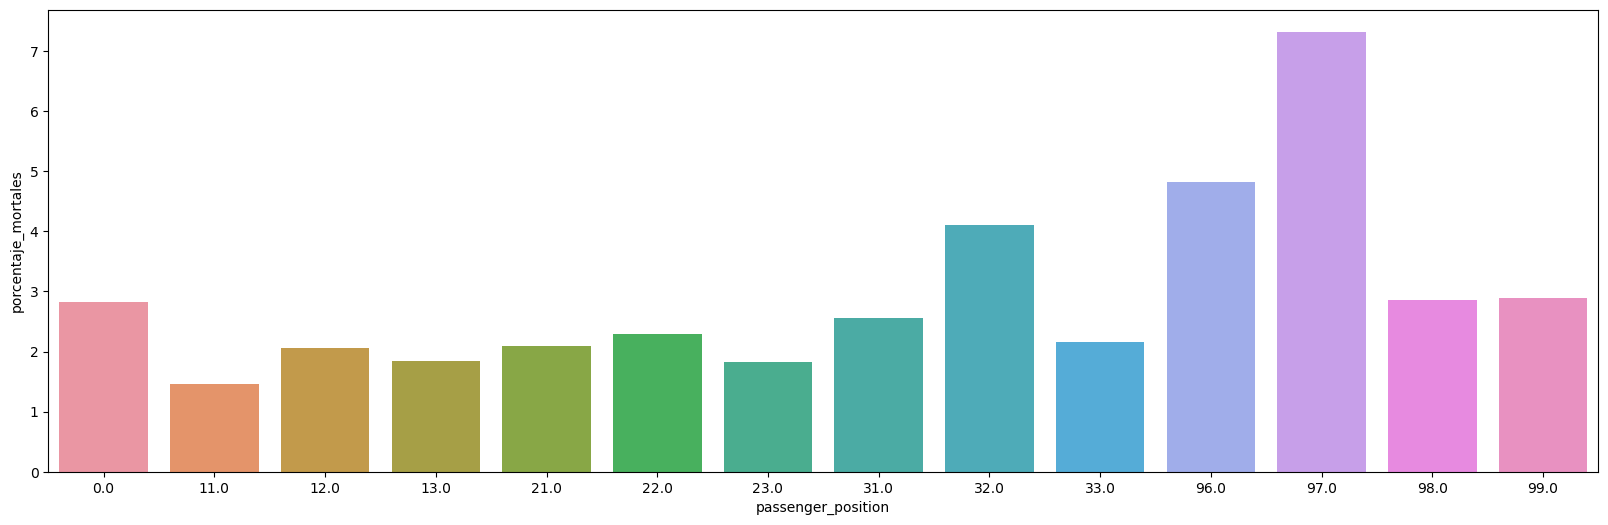

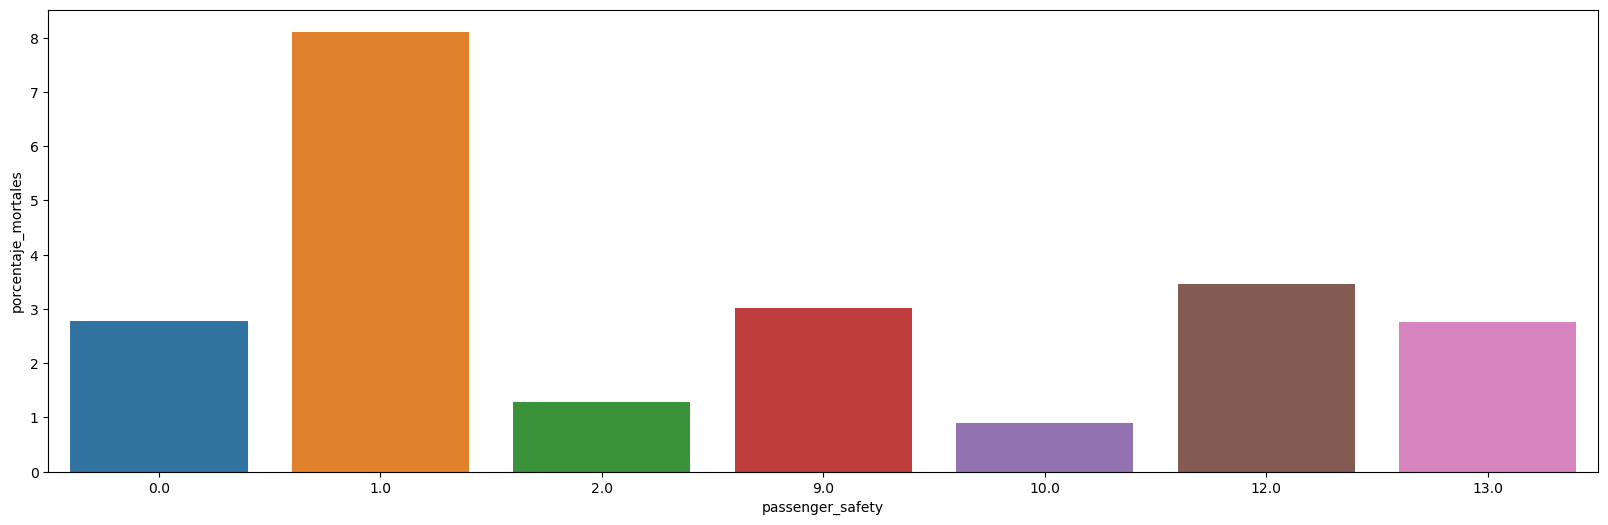

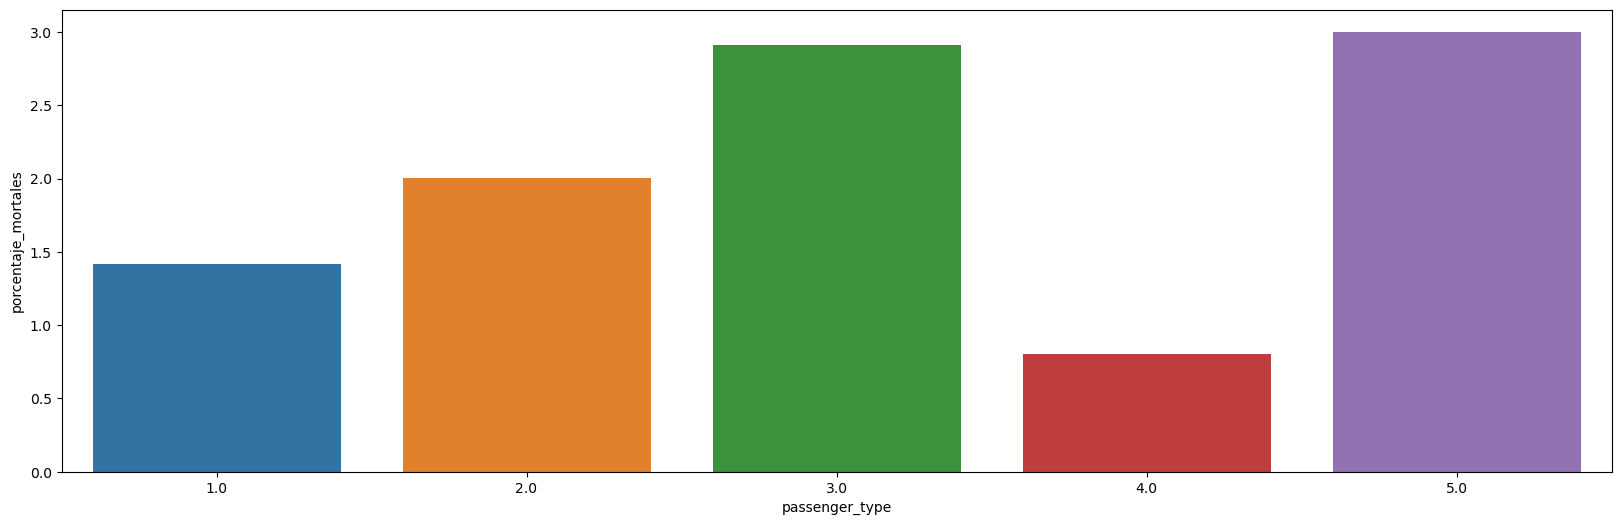

In [46]:
for elem in columns:
    datos_help = datos[datos['fatality'] == 1]
    data = pd.DataFrame(datos_help.groupby([elem])['fatality'].count())
    data['accidents'] = datos.groupby([elem])['fatality'].count()
    data['porcentaje_mortales'] = data['fatality'] / data['accidents'] * 100
    data = data.reset_index(level=0)
    plt.figure(figsize = (20,6))
    sns.barplot(data = data, x =elem, y = 'porcentaje_mortales')

Observando todas las variables somos capaces de a simple vista ver que variables afectan más al número de fallecimientos, variables como "road_alignment", "traffic", "passenger_safety", "passenger_age" etc son variables que afectan mucho a si un accidente es mortal o no. Más adelante utilizaremos un random forest para hallar que variables son las más utilizadas para predecir y por ello las que más afectan a que existan fallecimientos o no.

## 3.2. Estudio de la relación entre las variables

A continuación se estudia la relación entre las variables del dataset. Para ello se utilizará la V de Cramér es una medida del tamaño del efecto para la prueba chi-cuadrado de la independencia. En él se mide la forma en que están asociados dos campos categóricos. Se interpreta como:

* ES ≤ 0.2	El resultado es débil. Aunque el resultado es estadísticamente significativo, los campos sólo están débilmente asociados.
* 0.2 < ES ≤ 0.6	El resultado es moderado. Los campos están asociados moderadamente.
* ES > 0.6	El resultado es fuerte. Los campos están fuertemente asociados.

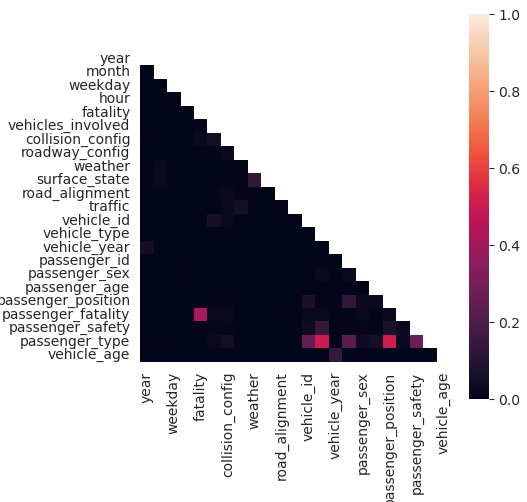

In [47]:
plt.figure(figsize=(5, 5))

def cramers_V(var1,var2) :
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
    stat = chi2_contingency(crosstab)[0] 
    obs = np.sum(crosstab) 
    mini = min(crosstab.shape)-1 
    return (stat/(obs*mini))

rows= []

for var1 in datos:
    col = []
    for var2 in datos :
        cramers =cramers_V(datos[var1], datos[var2]) 
        col.append(round(cramers,2)) 
    rows.append(col)
    
cramers_results = np.array(rows)
cramer = pd.DataFrame(cramers_results, columns = datos.columns, index =datos.columns)


mask = np.zeros_like(cramer, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(cramer, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

No parece que se observe ninguna relación fuerte entre ningún par de variables por lo que se conservarán todas. Posteriormente estudiaremos la importancia de las variables.

# 4. Selección de variables

Con los histogramas anteriores, hemos sido capaces de entender que variables son relevantes para el modelo y cuales no, sospechamos que la variable año, debido a que el porcentaje de muertos y el número de accidentes casi no varía, podríamos eliminarla del modelo, el problema vino cuando al predecir sin ella los resultados empeoraron, por lo tanto decidimos no eliminar la variable año de nuestro modelo. Y seguir con todas las variables.

## 4.1. Random Forest 

Otra forma de averiguar qué variables influyen es generar un modelo que clasifique entre accidentes mortales y no mortales, y estudiar en este las variables que tienen más relevancia.

In [48]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   year                float64
 1   month               float64
 2   weekday             float64
 3   hour                float64
 4   fatality            float64
 5   vehicles_involved   float64
 6   collision_config    float64
 7   roadway_config      float64
 8   weather             float64
 9   surface_state       float64
 10  road_alignment      float64
 11  traffic             float64
 12  vehicle_id          float64
 13  vehicle_type        float64
 14  vehicle_year        float64
 15  passenger_id        float64
 16  passenger_sex       float64
 17  passenger_age       float64
 18  passenger_position  float64
 19  passenger_fatality  float64
 20  passenger_safety    float64
 21  passenger_type      float64
 22  vehicle_age         float64
dtypes: float64(23)
memory usage: 1.0 GB


In [49]:
datos = datos.dropna()

Eliminamos los valores nulos para poder trabajar con algoritmos más adelante sin problemas de nulos.

In [50]:
def dibu(datos, var):
    plt.hist(datos[var])  

    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.title('Histograma de una variable')

    plt.show()

    print(Counter(datos[var]))

Representamos cuantos elementos de cada clase hay en la variable objetivo.

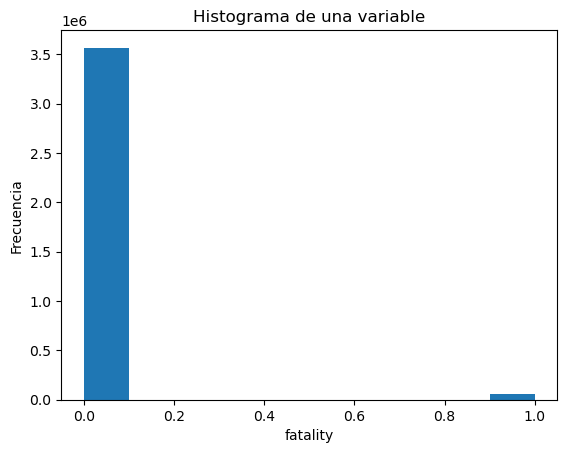

Counter({0.0: 3568366, 1.0: 61530})


In [51]:
dibu(datos, 'fatality')

### 4.1.1 Undersample

Sabemos que si una muestra de datos esta desbalanceada los resultados en los metodos de clasificación van a ser malos, debido a que la clase con menos observaciones serán peor predichas que las otras, por ello vamos a utilizar metodos estadísticos para igualar el número de observaciones por clases. Utilizaremos el método de undersample.

In [52]:
X = datos.drop('fatality', axis = 1)

In [53]:
X_fatality = X[datos['fatality'] == 1]
y_fatality = np.ones(X_fatality.shape[0],dtype=int)
len(y_fatality)

61530

In [54]:
X_nofatality = X[datos['fatality'] == 0]
y_nofatality = np.zeros(len(y_fatality))
random.seed(13)
X_nofatality = X_nofatality.sample(n=len(y_fatality), random_state=0)

Ahora unimos y barajamos los datos obtenidos.

In [55]:
under_X = pd.concat([X_fatality,X_nofatality])
under_y = np.concatenate((y_fatality,y_nofatality))
under_X, under_y = shuffle(under_X, under_y, random_state=0)

In [56]:
under_datos = under_X.copy()
under_datos['fatality'] = under_y

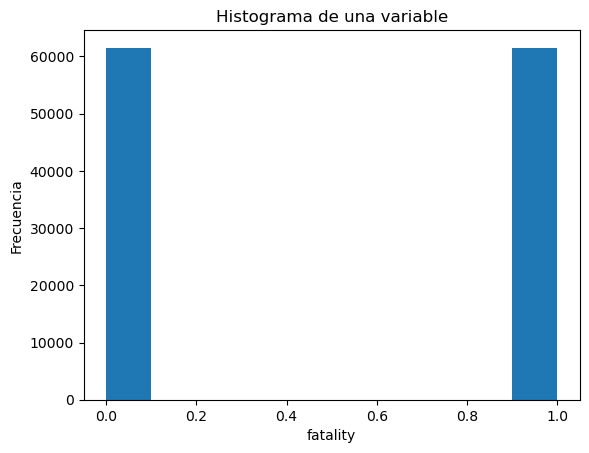

Counter({0.0: 61530, 1.0: 61530})


In [57]:
dibu(under_datos, 'fatality')

Se observa que ya tenemos el mismo número de elementos en cada clase.

In [58]:
under_X = under_datos.drop(['fatality', 'passenger_fatality'], axis=1)
under_y = under_datos['fatality']

Con suficiente profundidad, estos cortes de decisión terminarán aislando cada una de las categorías, de forma que, indirectamente, estaremos respetando la naturaleza categórica de las variables.


La razón de usar un RandomForest frente a un simple árbol de decisión es apoyarnos en la robustez y menor sesgo del primero, dado que al usar mucha profundidad se pueden incurrir en fallos de overfitting (aunque se use validación cruzada).

In [59]:
bosque = RandomForestClassifier(n_estimators=100)

In [60]:
param_grid = {'max_depth': [15, 20, 25]}

grid_search_bosque = GridSearchCV(bosque, param_grid, cv=5, n_jobs=-1)

grid_search_bosque.fit(under_X, under_y)

print("Mejor conjunto de parámetros: ", grid_search_bosque.best_params_)
print("Mejor puntuación de validación cruzada: {:.2f}".format(grid_search_bosque.best_score_))

Mejor conjunto de parámetros:  {'max_depth': 25}
Mejor puntuación de validación cruzada: 0.79


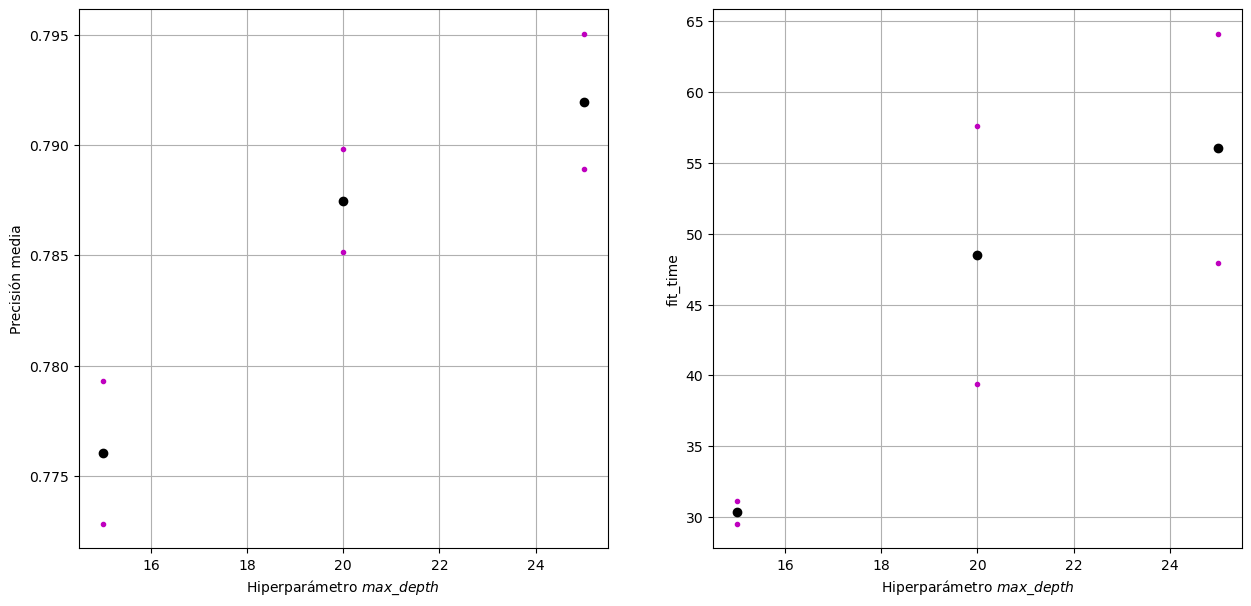

In [61]:
depths = [15, 20, 25]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1.plot(depths, grid_search_bosque.cv_results_['mean_test_score'], 'ok')
ax1.plot(depths, grid_search_bosque.cv_results_['mean_test_score'] + grid_search_bosque.cv_results_['std_test_score'], '.m')
ax1.plot(depths, grid_search_bosque.cv_results_['mean_test_score'] - grid_search_bosque.cv_results_['std_test_score'], '.m')
ax1.set_xlabel('Hiperparámetro $max\_depth$')
ax1.set_ylabel('Precisión media')
ax1.grid(True)

ax2.plot(depths, grid_search_bosque.cv_results_['mean_fit_time'], 'ok')
ax2.plot(depths, grid_search_bosque.cv_results_['mean_fit_time'] + grid_search_bosque.cv_results_['std_fit_time'], '.m')
ax2.plot(depths, grid_search_bosque.cv_results_['mean_fit_time'] - grid_search_bosque.cv_results_['std_fit_time'], '.m')
ax2.set_xlabel('Hiperparámetro $max\_depth$')
ax2.set_ylabel('fit_time')
ax2.grid(True)

Observamos que, teniendo en cuenta las desviaciones típicas, el modelo de *max_depth* = 25 no es significativamente distinto del de 20, por lo que optamos por este.

In [62]:
bosque = RandomForestClassifier(n_estimators = 100, max_depth=20) 
bosque.fit(under_X, under_y)

RandomForestClassifier(max_depth=20)

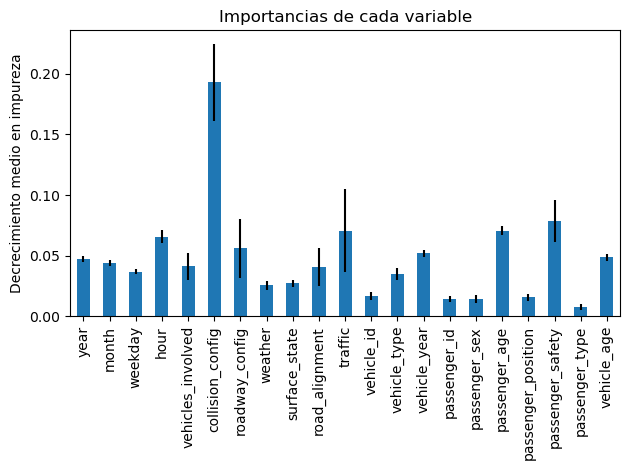

In [63]:
importancias = bosque.feature_importances_
std = np.std([tree.feature_importances_ for tree in bosque.estimators_], axis=0)
importancias_bosque = pd.Series(importancias, index=under_X.columns)

fig, ax = plt.subplots()
importancias_bosque.plot.bar(yerr=std, ax=ax)
ax.set_title("Importancias de cada variable")
ax.set_ylabel("Decrecimiento medio en impureza")
fig.tight_layout()

Tomemos uno de los árboles del bosque para representar las primeras decisiones.

[Text(0.5, 0.9, 'traffic <= 1.5\ngini = 0.5\nsamples = 77929\nvalue = [61357, 61703]'),
 Text(0.25, 0.7, 'hour <= 5.5\ngini = 0.362\nsamples = 15677\nvalue = [18858, 5876]'),
 Text(0.125, 0.5, 'vehicle_type <= 6.5\ngini = 0.499\nsamples = 1123\nvalue = [925, 832]'),
 Text(0.0625, 0.3, 'passenger_sex <= 0.5\ngini = 0.497\nsamples = 1056\nvalue = [888, 764]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'vehicle_age <= 8.5\ngini = 0.456\nsamples = 67\nvalue = [37, 68]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'road_alignment <= 1.5\ngini = 0.343\nsamples = 14554\nvalue = [17933, 5044]'),
 Text(0.3125, 0.3, 'passenger_safety <= 1.5\ngini = 0.323\nsamples = 12522\nvalue = [15768, 4010]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'traffic <= 0.5\ngini = 0.438\nsamples = 2032\nvalue = [2165, 1034]'),
 Text(0.40625, 0.1, '\n  (...)  \n

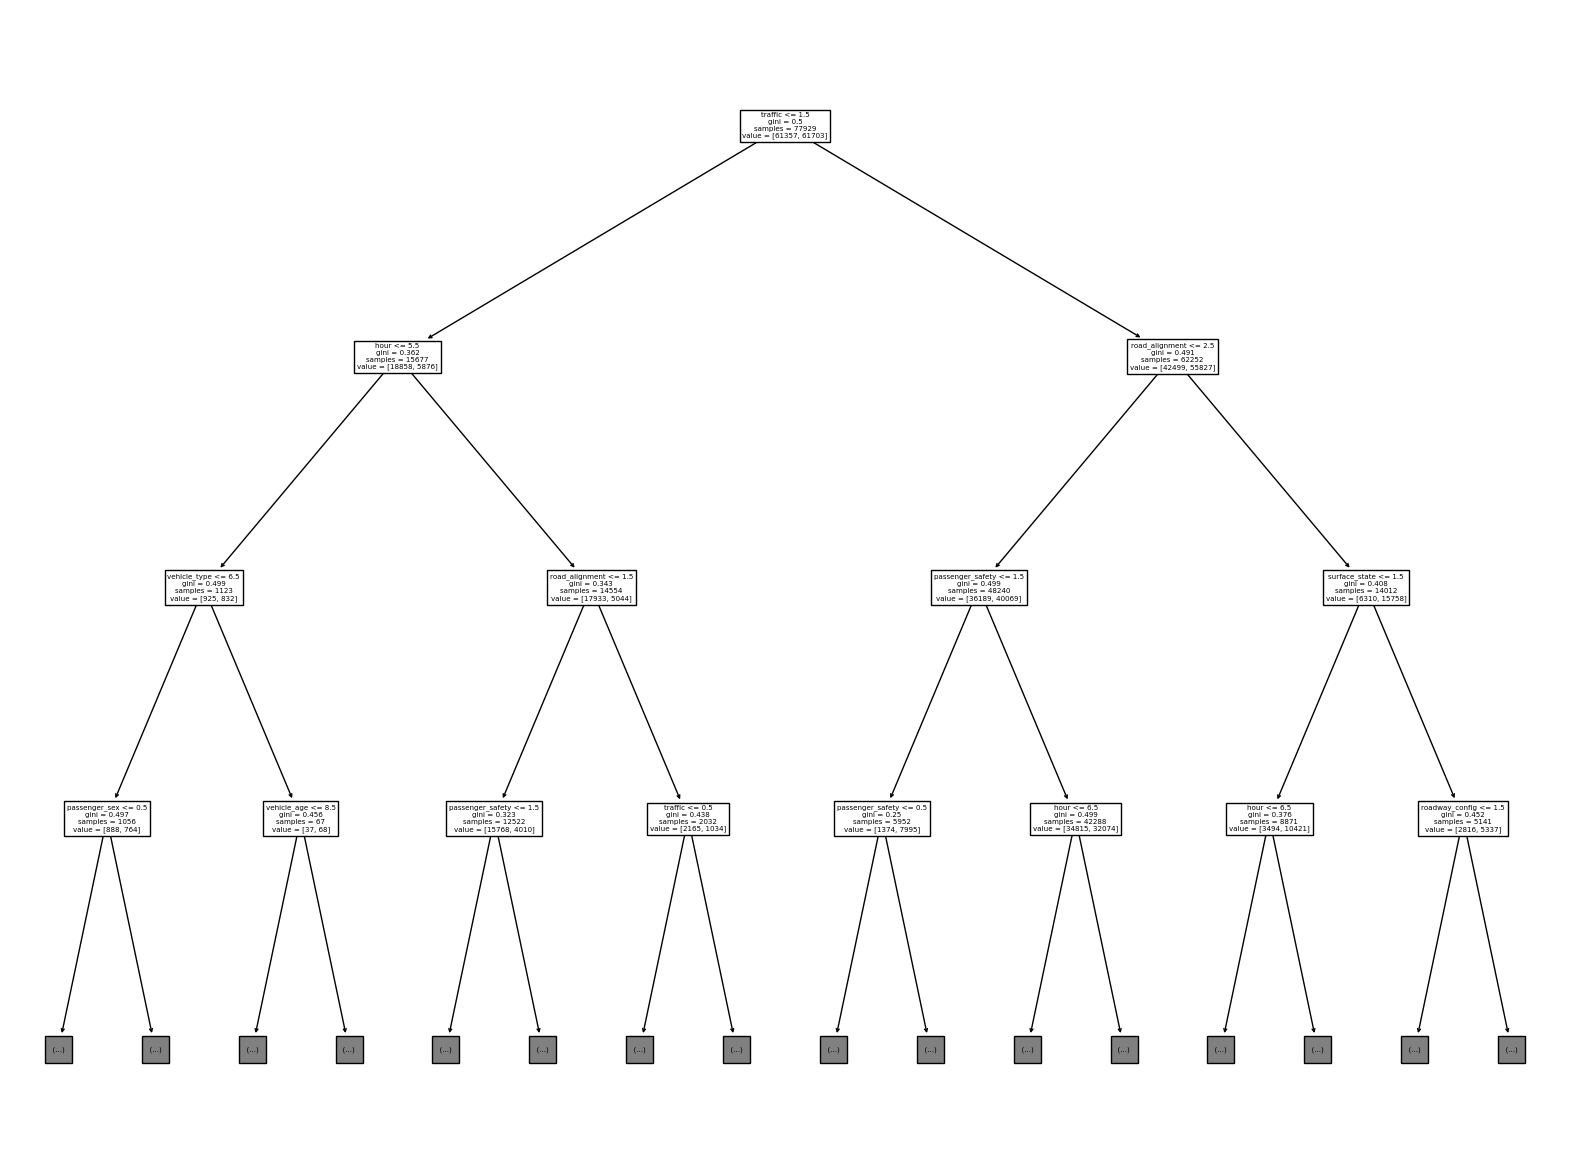

In [64]:
arbol = bosque.estimators_[33]

plt.figure(figsize=(20,15))
tree.plot_tree(arbol, feature_names=under_X.columns, max_depth=3)

Observamos que varias de las variables ya comentadas vuelven a aparecer como significativas a la hora de discernir entre fallecimiento o no.

# 5. Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no? 

A continuación probaremos modelos que nos permitan predecir si el accidente es mortal o no, utilizaremos algoritmos como naive bayes, Gradient Boosting Classifier, XGBoost Classifier y redes neuronales.

## 5.1. Naive Bayes

In [65]:
naive_bayes = GaussianNB()

scores = cross_val_score(naive_bayes, under_X, under_y, cv=5)

print("Precisión por fold:", scores)
print("Precisión media:", scores.mean())
print("Desviación estándar:", scores.std())

Precisión por fold: [0.5596457  0.55732976 0.55737039 0.5576548  0.5576548 ]
Precisión media: 0.5579310905249473
Desviación estándar: 0.0008681645003339399


Se observa que los resultados de Naive Bayes son bastante malos, ya que si clasificaramos al azar tendríamos un 0.5 de probabilidad de acertar para este caso, es decir, Naive Bayes solo hace que nuestras predicciones mejoren un 0.05 más que hacerlas al azar.

## 5.2. Gradient boosting

In [66]:
gb_classifier = GradientBoostingClassifier()

scores = cross_val_score(gb_classifier, under_X, under_y, cv=5)

print("Precisión por fold:", scores)
print("Precisión media:", scores.mean())
print("Desviación estándar:", scores.std())


Precisión por fold: [0.75255973 0.76523647 0.7598326  0.75593207 0.75288477]
Precisión media: 0.7572891272549975
Desviación estándar: 0.004758922402681441


Se observar resultados bastante mejores que Naive Bayes con una precisión media de 0.75

## 5.3. XGBoost

In [67]:
xgb_model = xgb.XGBClassifier()

cv_scores = cross_val_score(xgb_model, under_X, under_y, cv=5)

print("Puntuaciones de validación cruzada:", cv_scores)
print("Puntuación media:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())

Puntuaciones de validación cruzada: [0.7747034  0.77771006 0.77746628 0.77474403 0.77490655]
Puntuación media: 0.7759060620835365
Desviación estándar: 0.0013772750094520835


Xgboost nos da los mejores resutados hasta el momento con un predicción media de 0.77

## 5.4. Red neuronal

Probamos red neuronal con 20 capas ocultas y 20 neuronas por capa oculta

In [68]:
neural_network = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1000)

scores = cross_val_score(neural_network, under_X, under_y, cv=5, scoring='accuracy')

print("Precisión por fold:", scores)
print("Precisión media:", scores.mean())
print("Desviación estándar:", scores.std())


Precisión por fold: [0.59300341 0.51442386 0.63249634 0.71903949 0.64066309]
Precisión media: 0.6199252397204615
Desviación estándar: 0.06673387828911093


Obtenemos unos resultados de precisión media 0.68.

Concluimos que el modelo con los mejores resultados es el modelo XGBoost Classifier.

# 6.  Dado un accidente, ¿se puede generar un modelo que prediga si se va a necesitar tratamiento médico o no?

A continuación crearemos modelos para predecir si un paciente necesita tratamiento medico o no, para ello analizaremos al variable "passenger_fatality" que nos indica como el paciente ha salido resultado del accidente.

"passenger_fatality" tiene 3 posibles valores: No injury en donde no se necesitará tratamiento medico debido a que no ha sido herido el pasajero, Injury en donde si se necesitará asistencia médica para ayudar al paciente debido a que esta herido, y por último, Fatality donde no se necesitará asistencia médica debido a que el paciente murió inmediatamente.

Lo que haremos será convertir la variable "passenger_fatality" en una nueva variable que solo recoga los valores 0 para no tratamiento médico y 1 para tratamiento médico. Usando las relaciones comentadas anteriormente.

In [69]:
Counter(datos['passenger_fatality'])

Counter({2.0: 2062136, 1.0: 1543682, 3.0: 24078})

In [70]:
under_datos['medical_treatment'] = under_datos['passenger_fatality'].replace({1: 0, 3: 0, 2: 1})

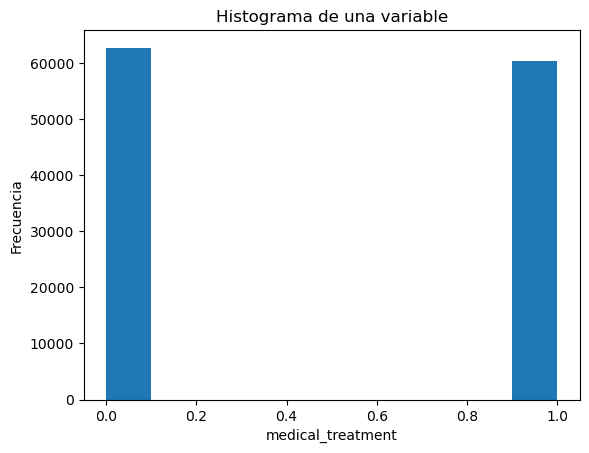

Counter({0.0: 62750, 1.0: 60310})


In [71]:
dibu(under_datos,  'medical_treatment')

Se observa que la proporción de las clases en "medical_treatment" es muy parecida, por lo tanto consideramos que no es necesario aplicar metodos de oversample ni undersample.

In [72]:
under_datos_sin_passenger_fatality = under_datos.drop('passenger_fatality', axis = 1)

In [73]:
under_X_sin_passenger_fatality = under_datos_sin_passenger_fatality.drop('medical_treatment', axis = 1)
under_y_sin_passenger_fatality = under_datos_sin_passenger_fatality['medical_treatment']

## 6.1. Naive Bayes

In [74]:
naive_bayes = GaussianNB()

scores = cross_val_score(naive_bayes, under_X_sin_passenger_fatality, under_y_sin_passenger_fatality, cv=5)

print("Precisión por fold:", scores)
print("Precisión media:", scores.mean())
print("Desviación estándar:", scores.std())


Precisión por fold: [0.53173249 0.53392654 0.5325451  0.5320169  0.52783195]
Precisión media: 0.5316105964570128
Desviación estándar: 0.002034452634264378


Los resultados con Naive Bayes continuan siendo bastante malos.

## 6.2. Gradient boosting

In [75]:
gb_classifier = GradientBoostingClassifier()

scores = cross_val_score(gb_classifier, under_X_sin_passenger_fatality, under_y_sin_passenger_fatality, cv=5)

print("Precisión por fold:", scores)

print("Precisión media:", scores.mean())
print("Desviación estándar:", scores.std())


Precisión por fold: [0.65862181 0.66284739 0.66097838 0.66142532 0.66646351]
Precisión media: 0.6620672842515847
Desviación estándar: 0.002584744081235048


Respecto al Gradient Boosting realizado anterior sus resultados empeoran pero siguen mejorando al método Naive Bayes

## 6.3. XGBoost

In [76]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

cv_scores = cross_val_score(xgb_model, under_X_sin_passenger_fatality, under_y_sin_passenger_fatality, cv=5)

print("Precisión por fold:", cv_scores)

print("Precisión media:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())


Precisión por fold: [0.67064846 0.67320819 0.67170486 0.67771819 0.67637738]
Precisión media: 0.6739314155696408
Desviación estándar: 0.0027048376953788937


Obteniendo una puntiación media de 0.673, es el mejor resultado hasta el momento

## 6.4. Red neuronal

Probamos red neuronal con 20 capas ocultas y 20 neuronas por capa oculta

In [77]:
neural_network = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1000)

scores = cross_val_score(neural_network, under_X_sin_passenger_fatality, under_y_sin_passenger_fatality, cv=5)

print("Precisión por fold:", scores)

print("Precisión media:", scores.mean())
print("Desviación estándar:", scores.std())


Precisión por fold: [0.59535999 0.4916301  0.60381115 0.51149846 0.62636112]
Precisión media: 0.5657321631724362
Desviación estándar: 0.05373285580141083


Los resultados no alcanzan 0.6 de puntuación media.

## 6.5. Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

cv_scores = cross_val_score(rf_model, under_X_sin_passenger_fatality, under_y_sin_passenger_fatality, cv=5, scoring='accuracy')

print("Precisión por fold:", cv_scores)

print("Precisión media:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())

Precisión por fold: [0.66183163 0.67223306 0.67284252 0.67198927 0.67300504]
Precisión media: 0.6703803022915651
Desviación estándar: 0.004290759246890453


El Random Forest se queda muy cerca del modelo XGBoost, teniendo un puntuación media de 0.669

Llegamos a la conclusión que predecir si una persona necesita tratamiento médico o no es más complicado que predecir si fallecerá o no, debido a que los resultados son peores. En este caso también llegamos a que el mejor modelo viene dado por el modelo XGBoost Classifier.

# 7. Las aseguradoras tienen que inmovilizar capital para pagar estas casuísticas.

Analizaremos que factores deben tener en cuenta las aseguradoras para aunmetar o disminuir la prima del seguro a alguien.

Analizaremos qué tipo de vehiculo es, el sexo del pasajero, la edad del pasajero y por último, cuántos años tiene el vehículo que se va a asegurar.

In [79]:
columns = ['vehicle_type', 'passenger_sex', 'passenger_age', 'vehicle_age']

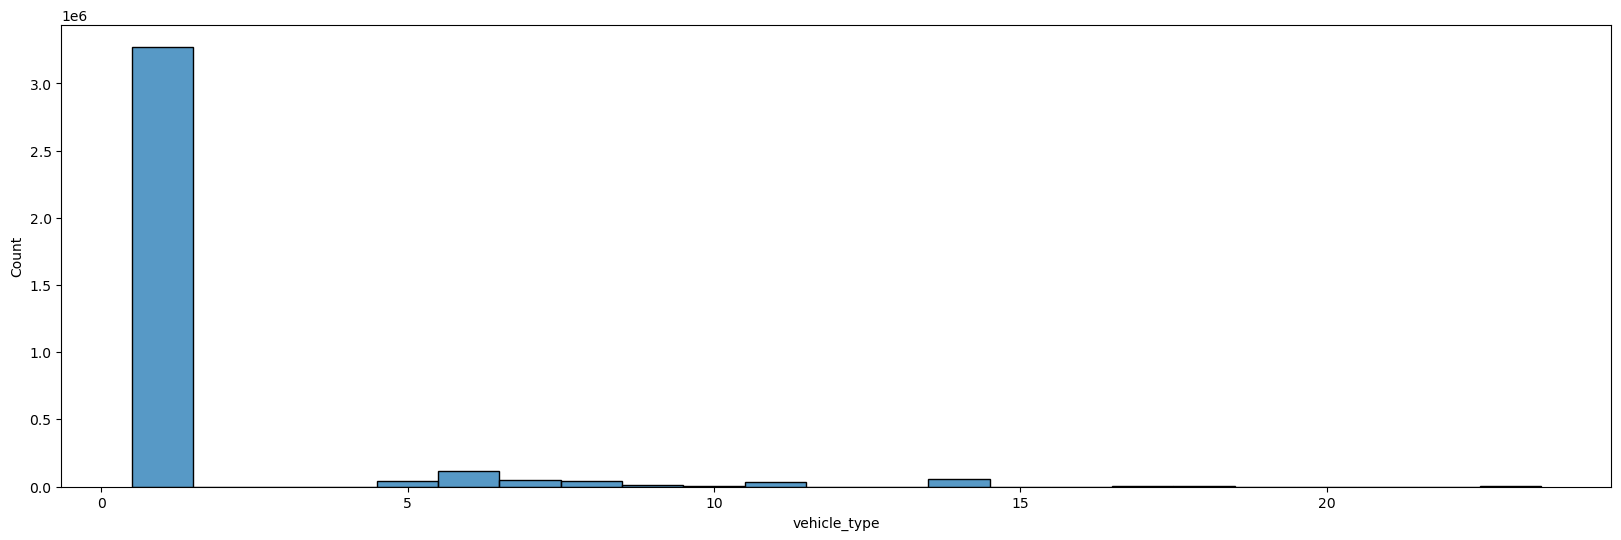

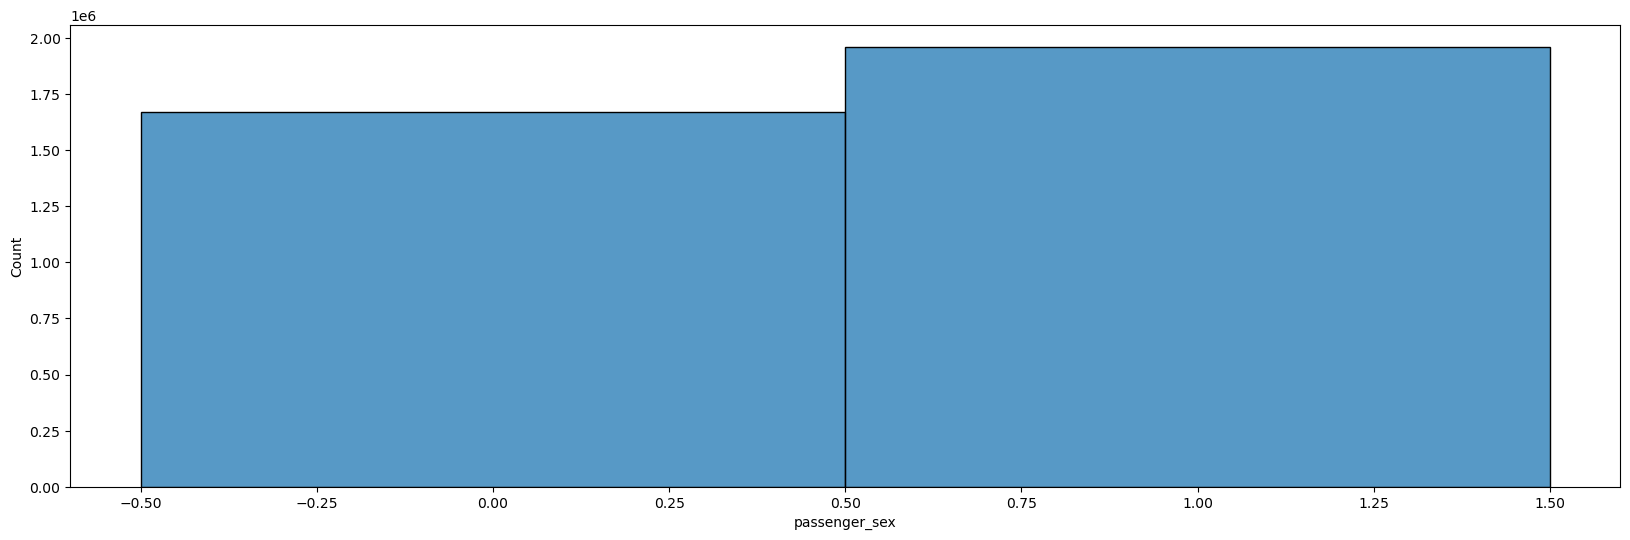

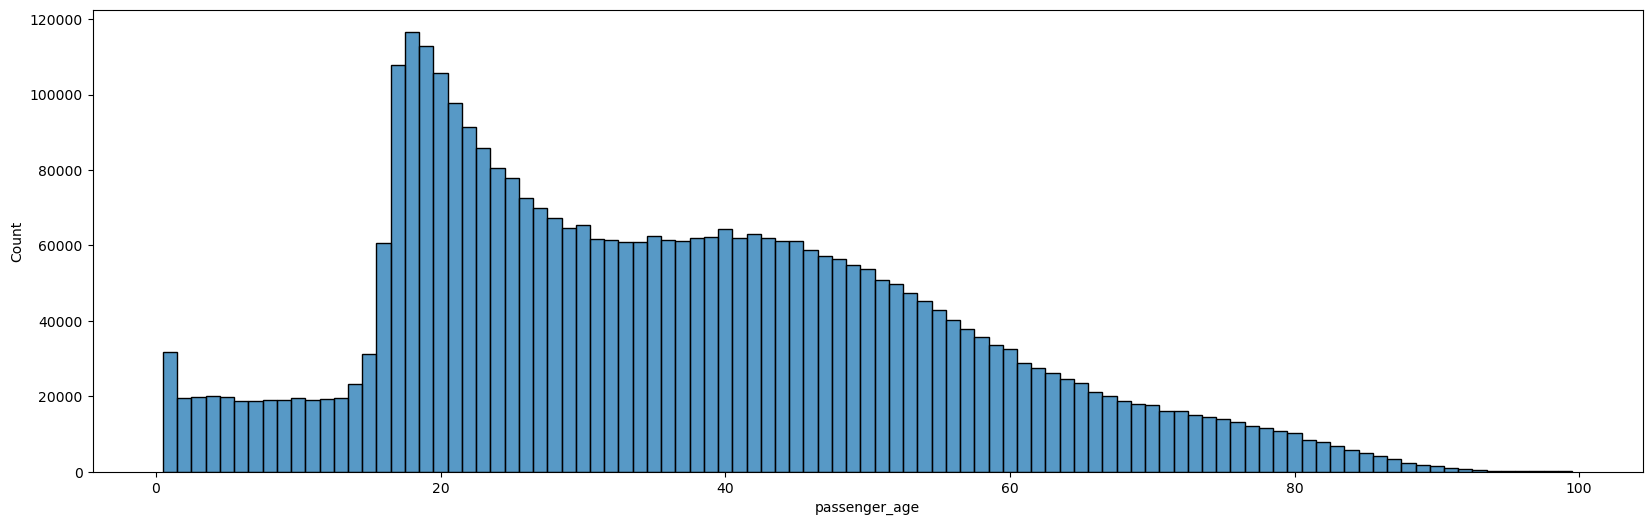

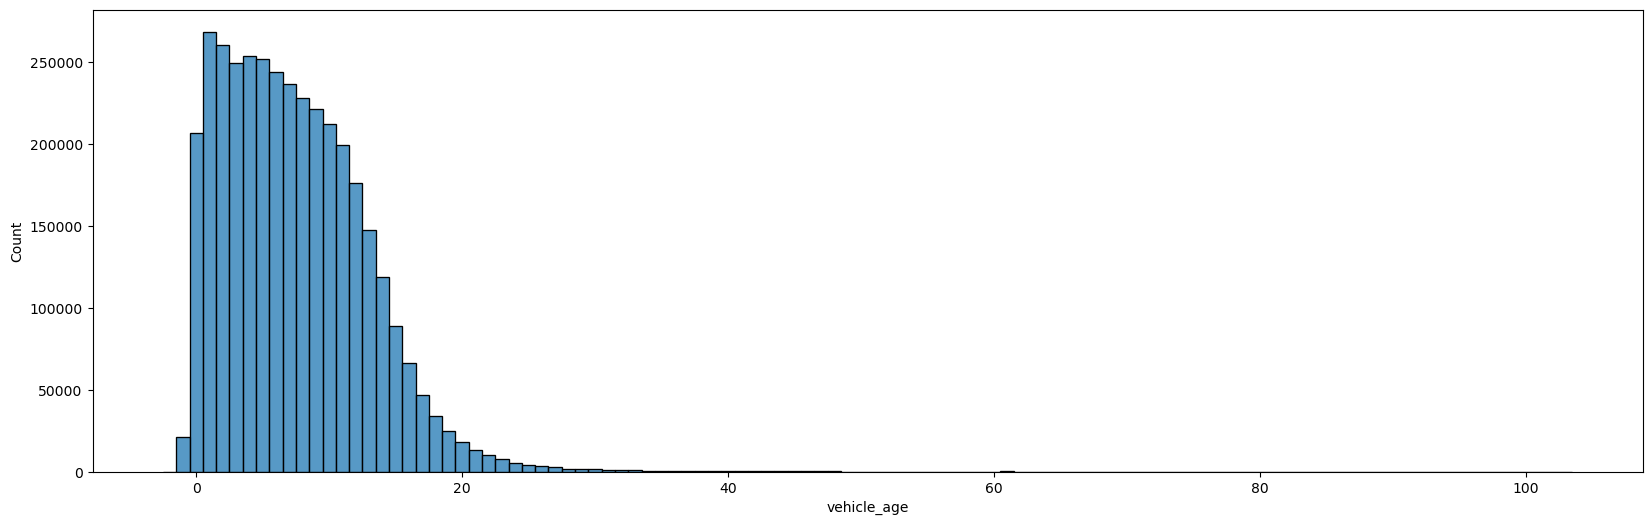

In [80]:
for elem in columns:
    plt.figure(figsize = (20,6))
    sns.histplot(datos, x=elem, element="bars", bins=40, discrete=True)

Observamos que por el tipo de coche no se puede discriminar, debido a que es normal que haya más accidentes en vehículos ligeros, ya que son mucho más comunes que el resto de tipos de vehículos.

Podríamos fijarnos en el sexo, indicando que si el conductor que va a conducir el coche es hombre, es más probable que sufra un accidente.

La característica más discriminante en nuestra opinión es la edad del pasajero, se observa que entre 18 - 35 años, la probabilidad de sufrir un accidente es más alta que el resto.

Por último, la edad del coche puede ser una referencia sutil, podemos observar que a partir de los 20 años los coches tienen pocos accidentes, esto probablemente se deba a que pocos coches llegan a los 20 años sin estropearse, entonces pocos pueden sufrir accidentes, por lo tanto no podemos tenerlo en cuenta. En cambio supondremos que todos o la mayoría de los coches superan los 5 años de conducción sin estropearse, si tenemos encuenta esto podemos llegar a la conclusión de que si el coche es nuevo o de un año existen un poco más de probabilidades de sufrir un accidente, lo cual podremos tener en cuenta.

Conclusión, el factor más determinante será la edad, aunque también podremos tener en cuenta el sexo y la antiguedad del coche para aumentar o disminuir la prima a cobrar.

# 8. Estudio de accidentes por sexo

Vamos a estudiar por qué mueren más, en porcentaje, los hombres que las mujeres en los accidentes.

<Axes: xlabel='passenger_sex', ylabel='porcentaje_mortales'>

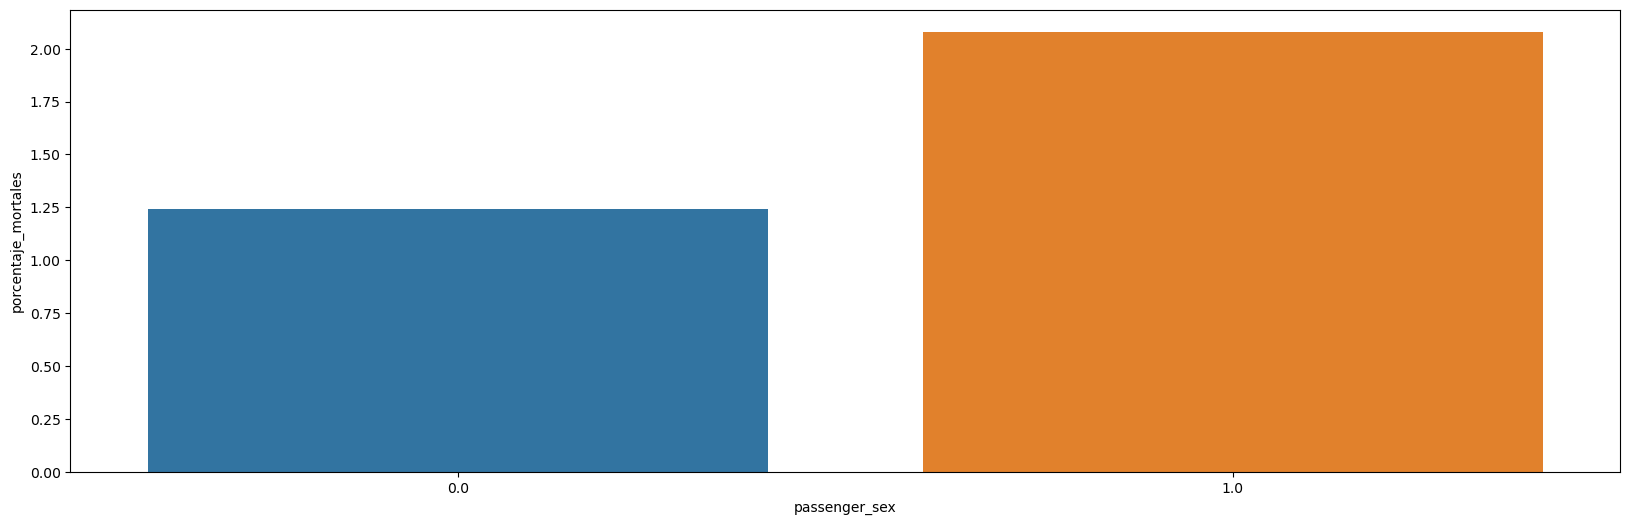

In [81]:
datos_help = datos[datos['fatality'] == 1]
data = pd.DataFrame(datos_help.groupby(['passenger_sex'])['fatality'].count())
data['accidents'] = datos.groupby(['passenger_sex'])['fatality'].count()
data['porcentaje_mortales'] = data['fatality'] / data['accidents'] * 100
data = data.reset_index(level=0)
plt.figure(figsize = (20,6))
sns.barplot(data = data, x = 'passenger_sex', y = 'porcentaje_mortales')

Se observa que un aproximado 2% de los hombres que sufren un accidentes mueren, en cambio en el caso de las mujeres el 1.25% mueren. Estudiaremos el porqué de esto.

Analizaremos algunas variables agrupando por sexo

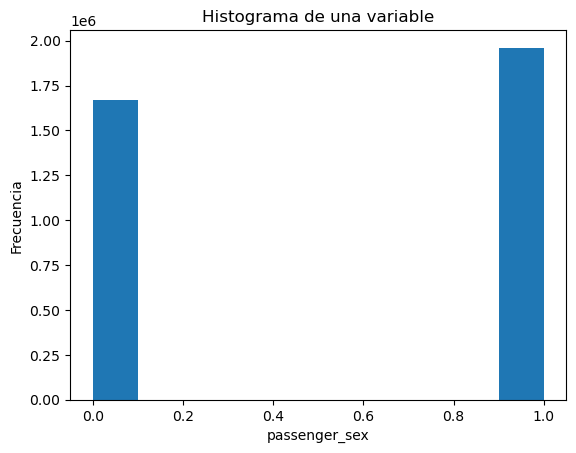

Counter({1.0: 1960861, 0.0: 1669035})


In [82]:
dibu(datos,'passenger_sex')

Observamos un número parecido de hombres que de mujeres en nuestros datos, vamos a separarlos en datasets diferentes para analizarlos mejor y comparar.

In [83]:
datos_hombres = datos[datos['passenger_sex'] == 1]
datos_mujeres = datos[datos['passenger_sex'] == 0]

In [84]:
datos_hombres = datos_hombres.sample(n=len(datos_mujeres), random_state=0)

In [85]:
datos_sex = pd.concat([datos_hombres, datos_mujeres], axis =0)

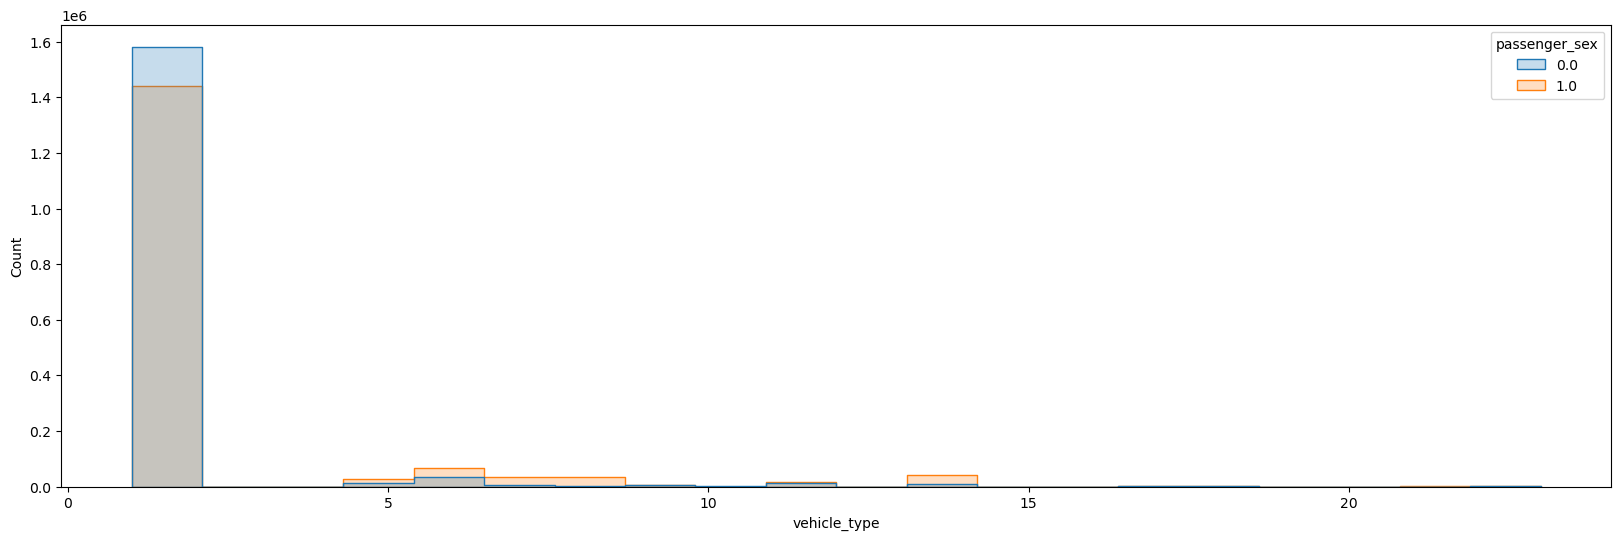

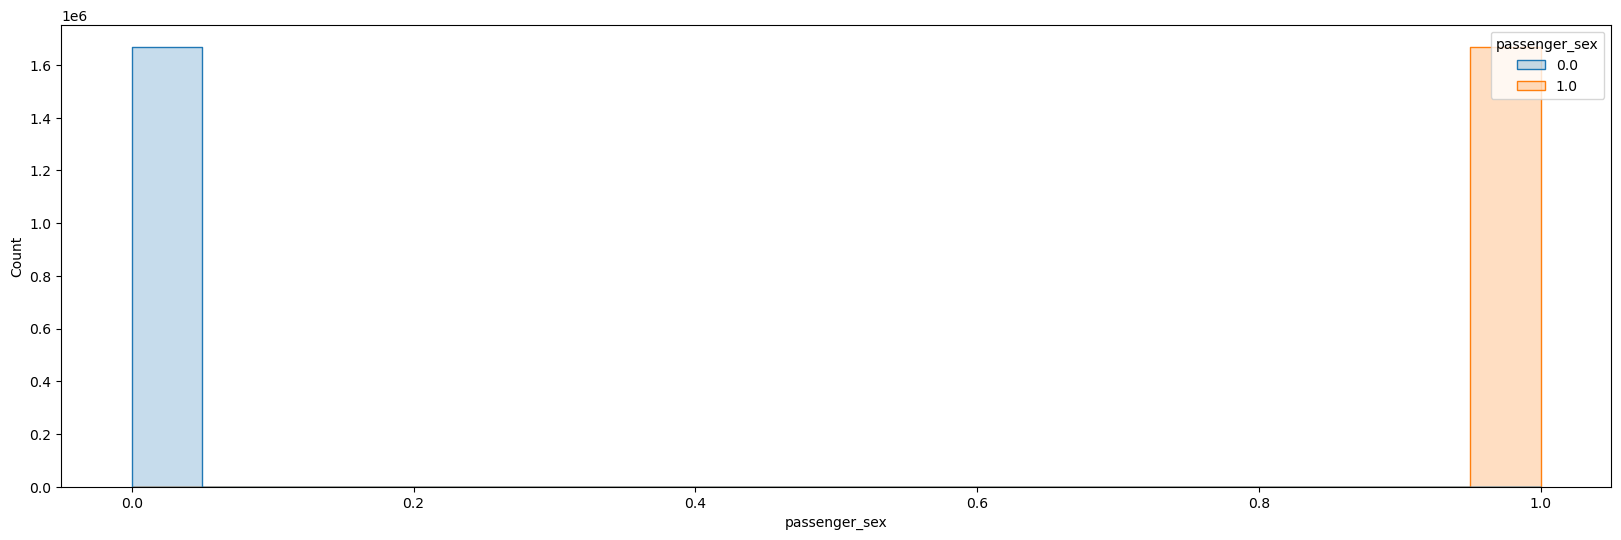

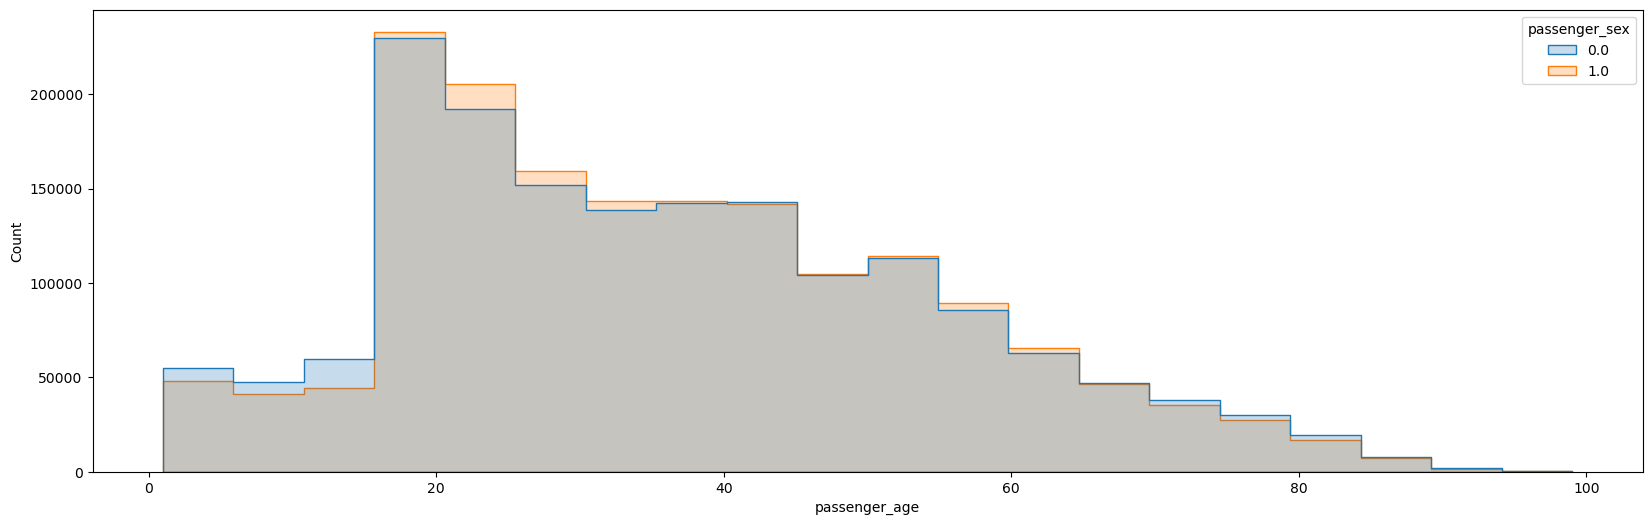

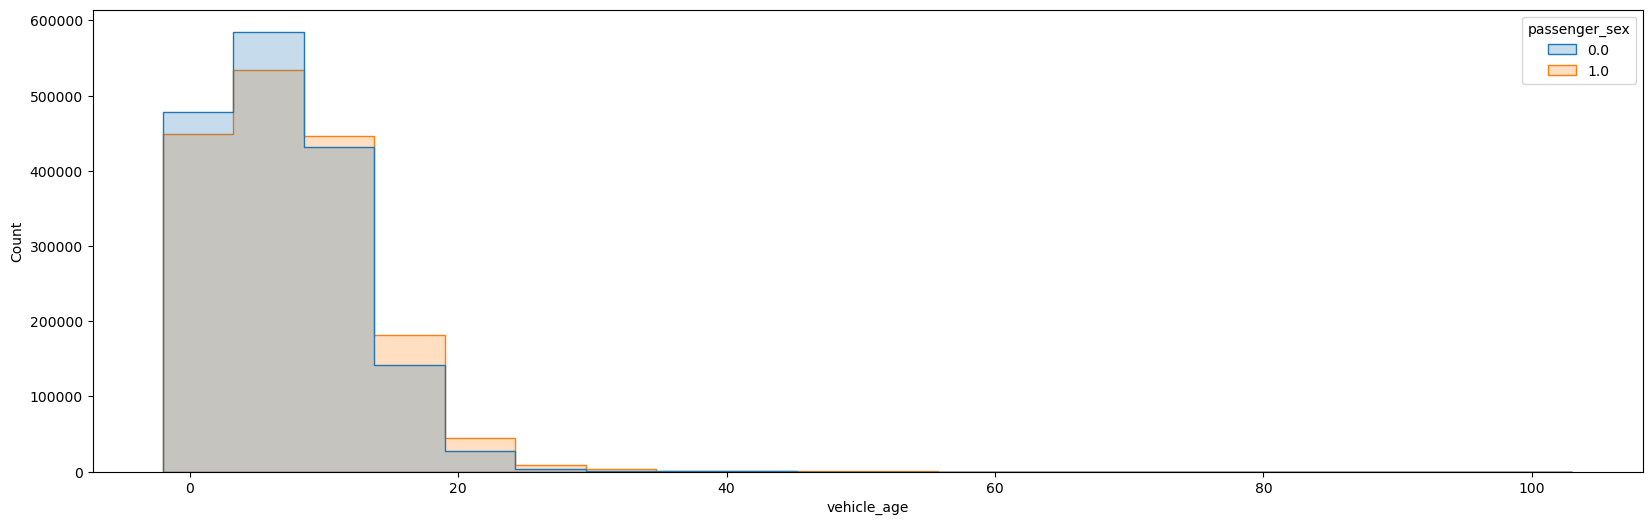

In [86]:
for elem in columns:
    plt.figure(figsize = (20,6))
    sns.histplot(datos_sex, x=elem, hue="passenger_sex", element="step", bins=20)

Con estos gráficos somos capaces de sacar conclusiones muy interesantes.

1. Los hombres tienden a accidentarse más que las mujeres en meses de verano, cuya época del año es más probable que un accidente sea mortal, en cambio las mujeres tienden a accidentarse en invierno, donde los accidentes tienden a no ser tan mortales.
2. Los hombres sufren más accidentes por la madrugada que las mujeres, sabemos que la probabilidad de fallecer en un accidente en la madrugada es la más alta del día, en cambio las mujeres tienden a sufrir los accidentes en horario laboral.
3. El tipo de colisión más mortal, el frontal, suelen sufrirlo más hombres que mujeres, además las mujeres tienden a sufrir más colisiones del tipo colisión trasera que es muy poco mortal.
4. Los hombres tienden a sufrir más accidentes en una intersección de al menos dos vías públicas que las mujeres, estos últimos accidentes son más mortales que los accidentes que las mujeres suelen sufrir más que los hombres, los accidentes en una intersección con entrada/salida de aparcamiento, camino privado o callejuela.
5. Los hombres sufren más accidentes en tipos de vehiculos como camiones o furgonetas con más probabilidad de accidente mortal que las mujeres.
6. Los hombres tienden a conducir coches más antiguos que las mujeres, siendo la probabilidad de sufrir un accidente mortal mayor si el coche es antiguo.
7. Los hombres tiende a sufrir más accidentes siendo jóvenes que las mujeres, la juventud es la edad con más probabilidad de sufrir accidentes mortales.
8. Los hombres tiende a sufrir el doble de accidentes que las mujeres sin utilizar ningún dispositivo de seguridad, cuya condición eleva mucho la probabilidad de que el accidente sea mortal.

En conclusión, los hombres tienen más probabilidad de morir en un accidente que las mujeres, debido a que se ven más envueltos en accidentes con circunstancias más mortales. 

# 9. ¿Son los mismos accidentes los de 2014 y 2015 que los de 1999 y 2000?

In [87]:
from scipy import stats

def test_homogeneidad(antes, despues):
    ni = antes + despues
    nj = [sum(antes), sum(despues)]
    N =sum(nj)
    
    values = []
    for i in range(len(ni)):
        esp = ni[i]*nj[0]/N
        values.append((antes[i]-esp)**2/esp)
    for i in range(len(ni)):
        esp = ni[i]*nj[1]/N
        values.append((despues[i]-esp)**2/esp)
    
    print(f"El p-valor del contraste es: {1-stats.chi2.cdf(sum(values), len(ni)-1)}")
    pass

In [88]:
np.sort(under_datos['year'].unique())

array([1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014.])

In [89]:
antes = under_datos[(under_datos['year'] == 1999) | (under_datos['year'] == 2000)]
despues = under_datos[(under_datos['year'] == 2013) | (under_datos['year'] == 2014)]

In [90]:
len(antes), len(despues)

(17325, 12074)

In [91]:
antes_ps = antes[antes['passenger_safety'] != 0]
despues_ps = despues[despues['passenger_safety'] != 0]

In [92]:
n_antes = antes_ps['passenger_safety'].value_counts().sort_index().values
n_despues =despues_ps['passenger_safety'].value_counts().sort_index().values
test_homogeneidad(n_antes, n_despues)

El p-valor del contraste es: 0.0


En consecuencia, rechazamos que la seguridad sea similar. En particular, observamos que hay más seguridad en años posteriores.

In [93]:
test_homogeneidad(antes['passenger_sex'].value_counts().sort_index().values, despues['passenger_sex'].value_counts().sort_index().values)

El p-valor del contraste es: 0.053055878669274525


A un nivel de confianza de 0.05 no existe evidencia suficiente como para rechazar la hipótesis nula de que la proporción de hombres y mujeres es similar en las dos épocas de estudio.

In [94]:
test_homogeneidad(antes['passenger_fatality'].value_counts().sort_index().values, despues['passenger_fatality'].value_counts().sort_index().values)

El p-valor del contraste es: 0.0


Varía también la gravedad de los accidentes.